In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy.optimize import fsolve
import scipy as sp
from scipy.integrate import quad
from scipy.integrate import odeint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

Assume we have the one dimensional process model

xi = αxi−1 + δi
, with δi ∼ N (0, q2), i = 1, · · · , N,

and x0 is from a standard normal distribution. Assume the data model is

yi = hxi + εi

, with εi ∼ N (0, r2), i = 1, · · · , N, (2)
1).Write Python function called Process that takes α, N, q and return the array of xi
2.Write Python function called Data that takes array of xi
, r, h and return the array of yi
.

3 Write a program to plot the data on the same graph as the process model, for

r = 0.1, h = 1, α = 0.8, N = 30, q = 0.4 (3)

4.Run your code multiple times and describe what is happening.

5.Now fix the seed using the function (random.seed) and run your code multiple times and describe what is happening.

6.Use the general formulas given for the Kalman filter to find the one dimensional formulas
for

μ1|0, σ1|0, k1, μ1|1, σ1|1, (4)

in term of α, q, r, h and y1

7.Using the general formulas given for the Kalman filter, write Python program to calculate

μi|i−1, σi|i−1, ki
, μi|i
, σi|i
, (5)
for i = 1, · · · , N. Be sure to initialize the loop over i. Hint: I suggest using mu old[i] for
μi|i−1, sigma old[i] for σi|i−1, mu new[i] for μi|i

, sigma new[i] for σi|i

8.Identify the variables in your program that give
(a) a filtered estimate of the state and its uncertainty,

(b) a forecast of the state and its uncertainty.

9.Write a Python program to plot the states xi and data yi together with the filtered and
forecasted estimates on the same graph.

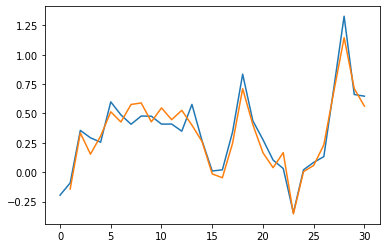

In [4]:
#Filtering

#no.1
def Process(a,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x


#no.2
def Data(x,r,h):
    y=h*x[1:]+np.random.normal(0,r,len(x)-1)
    return y

#no.3, 4 and no.5 np.seed(10)
x=Process(0.8,30,0.4)
y=Data(x,0.1,1)
plt.plot(np.arange(0,len(x)),x)
plt.plot(np.arange(1,len(x)),y)
plt.show()


In [6]:
#no.6 and no.7

def fs(al,N,q,h,r):
    mu_old=np.empty(N)
    mu_new=np.empty(N)
    k=np.empty(N+1)
    k[0]=h*(q+al**2)*(h**2*(q+al**2)+r)**(-1)
    sigma_new=np.empty(N)
    sigma_old=np.empty(N)
    sigma_old[0]= q+al**2
    sigma_new[0]=(1-k[1]+h)*(q+al**2)
    mu_new[0]=k[1]*y[1]-k[1]*h*(q+al**2)
    mu_old[0]=0
    
    for i in range(1,N):
        mu_old[i]=al*mu_new[i-1]
        sigma_old[i]=q+al*sigma_new[i-1]*al
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i]=(1-k[i]*h)*sigma_old[i]
        
    return mu_new ,sigma_new, mu_old, sigma_old

#no.8

mu_new, sigma_new, mu_old, sigma_old= fs(0.8,30,0.4,1,0.1) 
print("forcasted are",mu_new, sigma_new)
print("filtred are",mu_old, sigma_old)

#no.9
print(x,y)

# plt.plot(np.arange(1,len(x)),np.random.normal(mu_old,sigma_old))
# plt.plot(np.arange(1,len(x)),np.random.normal(mu_new,sigma_new))
# plt.plot(np.arange(0,len(x)),x)
# plt.plot(np.arange(1,len(x)),y)

# plt.show()

forcasted are [-0.70536514  0.25751347  0.16321827  0.27579279  0.46117835  0.41681981
  0.53269767  0.55994245  0.43233353  0.51092515  0.44033161  0.49512179
  0.40003685  0.27155057  0.02792324 -0.03396433  0.19555122  0.61054436
  0.42101077  0.19724708  0.06035874  0.14556943 -0.26904332 -0.03418983
  0.04237604  0.1970911   0.59675622  1.02384007  0.73110398  0.56648759] [1.04       0.09142073 0.08209519 0.08190179 0.08189774 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765]
filtred are [ 0.         -0.56429211  0.20601078  0.13057462  0.22063424  0.36894268
  0.33345585  0.42615814  0.44795396  0.34586682  0.40874012  0.35226529
  0.39609743  0.32002948  0.21724045  0.0223386  -0.02717147  0.15644097
  0.48843549  0.33680861  0.15779767  0.04828699  0.1

1. Load the titanic dataset from the seaborn package. 
2. Count the number of missing values in each column 
3. Clean the dataset by removing every record that contains a missing value? 
4. What is the size of the clean dataset? 
5. Count the number of survived females 
6. Compute the average age of males who did not survived? 
7. Reproduce the following three figures 



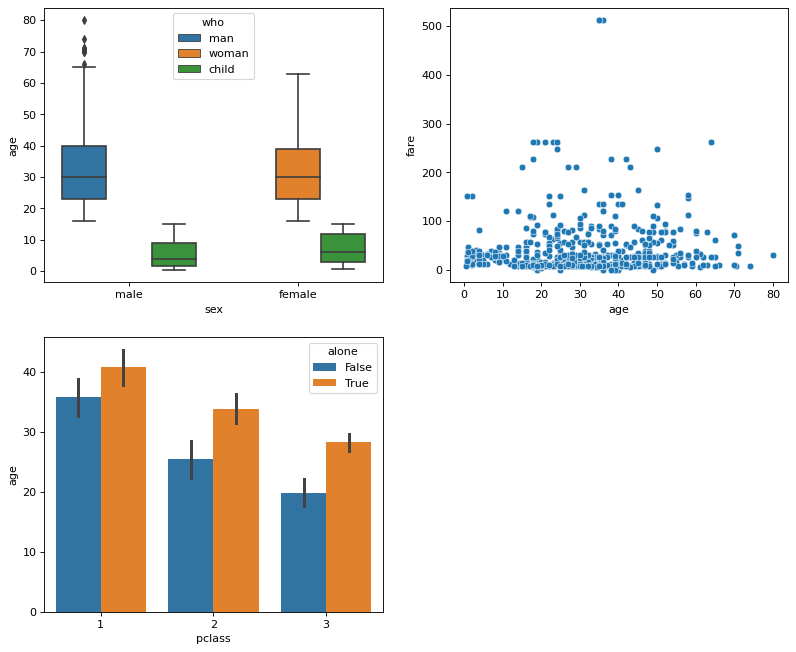

In [3]:
#01.
titanic_df = sns.load_dataset("titanic")
#titanic_df 

#02. # rturns number of mising values in each column

titanic_df.isnull().sum()

# 03. #drops the column and makes changes in the original data
# titanic_df.dropna(axis=0,inplace=True)

titanic_df.drop(columns=['deck'], inplace=True)

#03. #drops raws containihg nul 

titanic_df.dropna(axis=0, inplace=True)

#04 size
titanic_df.shape
    
# 05.Number of survived females
titanic_df.groupby(by=["survived", "sex"]).count().iloc[2,0]

titanic_df.loc[(titanic_df["sex"]=='female') & (titanic_df["survived"]== 1)].shape[0]

#06. 
titanic_df.groupby(by=["sex", "survived"])["age"].mean()[2]

#titanic_df.loc[(titanic_df["sex"]=='male') & (titanic_df["survived"]== 0)].shape[0]

#07.Reproduce the following three figures

plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="age", hue="who", data=titanic_df)

plt.subplot(2,2,2)
sns.scatterplot(x="age", y="fare", data=titanic_df)

plt.subplot(2,2,3)
sns.barplot(x="pclass", y="age", hue="alone", data=titanic_df)

plt.show()

1. import matlplot, pandas and seaborn packages 
2. set context of seaborn theme to poster 
3. load the diamonds dataset from seaborn package 
4. how many columns in this dataset? 
5. list the names of all columns and describe the datatype of each column? 
6. list the unique number of diamond colors in this dataset? 
7. what is the minimum depth of diamond? 
8. count the diamonds by their clarity and cut? 
9. list the color, clarity, and prices of the most expensive diamond? 
10. produce the following figures? 
11. build a regression model using carat, depth, x, y, and z columns as explana tory variables and price column as response variable, and report its accuracy using mean squared error metric? 


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
Number of col:  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        539

<AxesSubplot:xlabel='x', ylabel='price'>

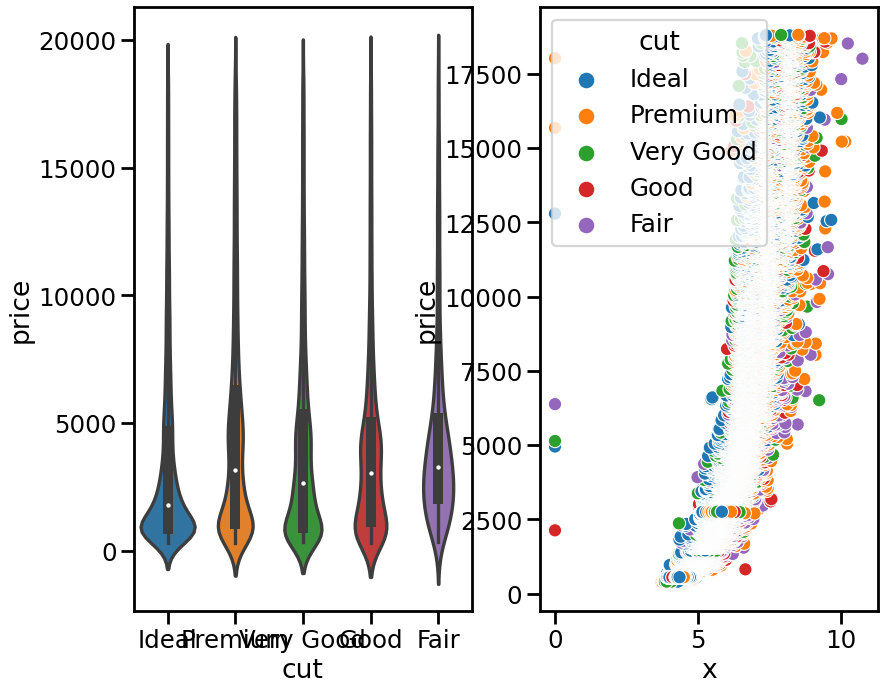

In [26]:
# 1.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#2.# set context of seaborn theme to poster 

sns.set_context("poster")

# 3.
# load the diamonds dataset from seaborn package
diamond = sns.load_dataset('diamonds')
print(diamond.head())

# 4.how many columns in this dataset?
print("Number of col: ", diamond.columns.size)

# 5. list the columns and describe the datatype of each column?
print(diamond.info())

# 6.list the unique number of diamond colors in this dataset?
print("colors: ",list(diamond['color'].values.unique()))

# 7.what is the minimum depth of diamond?

print("minimum depth of diamond: ",diamond['depth'].min())

# 8.count the diamonds by their clarity and cut?

number=diamond.groupby(by=['clarity','cut']).count()
#print(number)
number['Number']=number.x.values
number.loc[:,['Number']]

# 9. list the color, clarity, and prices of the most expensive diamond? 

most_exp= diamond['price'].max()
#print(most_exp)
diamond[diamond['price']==most_exp][['color','clarity','price']]

# 10.produce the following figures? 

plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(1,2,1)
sns.violinplot(x='cut',y='price',data=diamond)
plt.subplot(1,2,2)
sns.scatterplot(x='x',y='price',hue='cut',data=diamond)

Visualization and matplotlib

In [31]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 1000)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.png')   # calling savefig function to save the plot

# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

#combination
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

plt.axis('equal');  # equal option creates a 1:1 aspect ratio

plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 

plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'ok');

data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

#combination of histogram

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
plt.hist(x1, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

plt.legend(loc='upper right'); # adding positional argument to legend
plt.legend(loc='lower center', ncol=2, title='keys');

plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
    
    #subplot
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');
    
   #combined
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

 # Text and Annotation 
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));
    

plt.style.available? #showing styles
plt.style.use('seaborn')
#plt.scatter?


SyntaxError: invalid syntax (2736153564.py, line 105)

Numpy and scipy

In [ ]:
#Vectorization
def f1(x):
    if x > 0:
        return 2*x
    else:
        return 1+x

z = np.linspace(-5,5,3) 
g1 = np.vectorize(f1)
g1(z)


A.min()
A.max()
A.sum()
A.prod()
A.mean()
A.std()
np.dot(a,b)   # dot product = inner product=scalar product
a@b   
np.multiply(m,n)   # component-wise multiplication,equal to m*n
np.diagonal(m)    # return the elements on the diagonal
np.trace(m) # return trace or the sum of the diagonal elements
m.T #return the transpose of a function
np.linalg.det # to find out about the function det
np.linalg.inv # to find out about the function inv
e_values, e_vectors = np.linalg.eig(a) # returns the eigenvalues and right
# eigenvector of a square array

P = np.poly1d([2,-1, 0, -5])#coefficient of polynomial
np.poly1d(P)#print values of p

#System of Equations in Python    

A = np.array([ [3,-9], [2,4] ])
b = np.array([-42, 2])
z = np.linalg.solve(A,b)
x=z[0],y=z[1]

# system of non-linear equations
import scipy as sp
sp.optimize.fsolve
def myFunction(z):
    x = z[0]
    y = z[1]
    w = z[2]

    F = np.empty((3))
    F[0] = x**2+y**2-20
    F[1] = y - x**2
    F[2] = w + 5 - x*y
    return F

zGuess = np.array([0,1,1])
g = fsolve(myFunction,zGuess)
print(g)

#Integrals in python

a1, a2 = 0,3
b1, b2 = 2,5

f1 = lambda x: (x**3+5*x-20)/(x**2+3)
f2 = lambda x: (x - (1/3)) * np.sqrt(x**4 - 3)

A = quad(f1,a1,b1)[0]
B = quad(f2,a2,b2)[0]

#Fumction trap
def Trap(a,b,f, H=0.001):
    N = int((b-a)/H)
    t = np.linspace(a,b, N+1)
    Z = 0
    for i in range(1,len(t)):
        Z += ((f(t[i-1]) + f(t[i]))/2)*H
    return Z

#calling function trap
f1 = lambda x: (x**3+5*x-20)/(x**2+3)
f2 = lambda x: (x-(1/3))*np.sqrt(x**4-3)

print("A: ", Trap(0,2,f1))
print("B: ", Trap(3,5, f2))

#Solve system of ODEs in Python

# function that returns dz/dt
def model(z,t):
    x,y = z
    dxdt = 5*x-3*y 
    dydt = -6*x +2*y
    return np.array([dxdt,dydt])

# initial condition
z0 = np.array([1,2])

# time points
a = 0
b = 1
N = 100
t = np.linspace(a,b,N+1)

# solve ODE
z = odeint(model,z0,t)

x = z[:,0]
y = z[:,1]


**Exercise 4** <font color=red>(21/21) **_Excellent_** </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

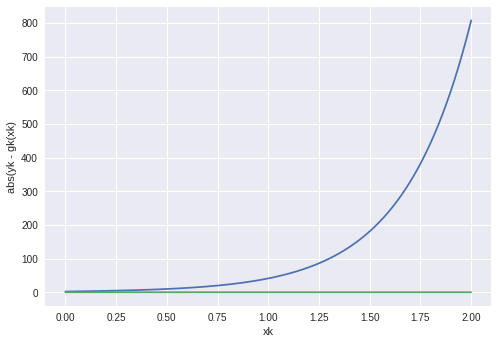

In [37]:
def SODE(a,b,H):
    # initial condition
    y0 = [2,8]
    
    # syst of odes
    def models(y,x):
        y,z = y
        dydx = z
        dzdx = 30*np.exp(3*x)-2*z
        return np.array([dydx,dzdx])

    # time points
    N = int((b-a)/H + 1)
    t = np.linspace(a,b,N)
    u = odeint(models,y0,t)
    return t, u[:,0]


#plot
t,ysol = SODE(0,2,0.001)
plt.plot(t,ysol)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#Exact solution

g = 2*np.exp(3*t) - np.exp(-2*t) + 1
e = np.absolute(ysol-g)
# plt.plot(t,ysol,t,g)
plt.plot(t,e)
plt.xlabel('x')
plt.ylabel('|y(x)-g(x)|')
plt.show()

#3pt h:vecotrization
def L2_error(a,b,H):
    x,ysol = SODE(a,b,H)
    g = 2*np.exp(3*x) - np.exp(-2*x) + 1
    L2Er = (H*(ysol - g)**2)
    return sum(L2Er)

#l2erro

Hj = np.array([10**-1,10**-2,10**-3,10**-4])
L2Erj = []
for i in Hj:
    L2Erj = np.append(L2Erj,L2_error(0,2,i))
print(L2Erj)

plt.plot(Hj,L2Erj)
plt.xlabel('Hj')
plt.ylabel('L2Erj')
plt.show()




**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [44]:
def EulerMethod(a,b,c,N,f):
    X=np.linspace(a,b,N+1)
    Y=np.zeros(N+1)
    Y[0]=c
    H=int((b-a)/N)
    for k in range(N):
        Y[k+1]=Y[k]+H*f(X[k],Y[k])
    return X,Y
        
def RK2Method(a,b,c,N,f):
    X=np.linspace(a,b,N+1)
    Y=np.zeros(N+1)
    Y[0]=c
    H=int((b-a)/N)
    for k in range(N):
        
        Y[k+1]=Y[k]+H*f(X[k]+H/2,Y[k]+(H/2)*f(X[k],Y[k]))
    return X,Y     

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

In [47]:
f=lambda x,y:2*y+ np.exp(2*x)
g=lambda x:(x+3)*np.exp(2*x)



odeint:


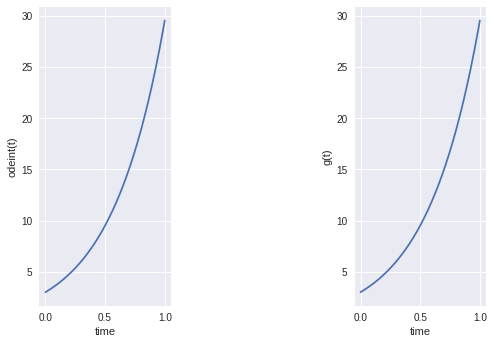

Euler method:


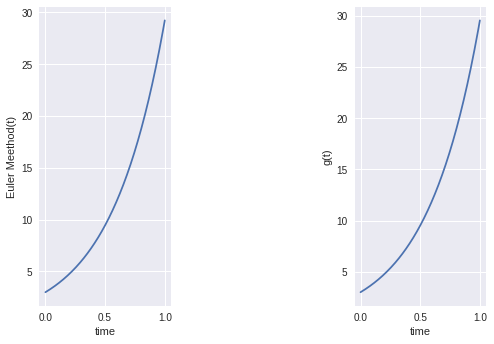

RK2Method:


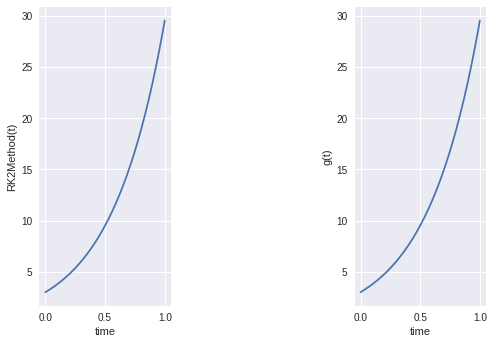

Absolute error:


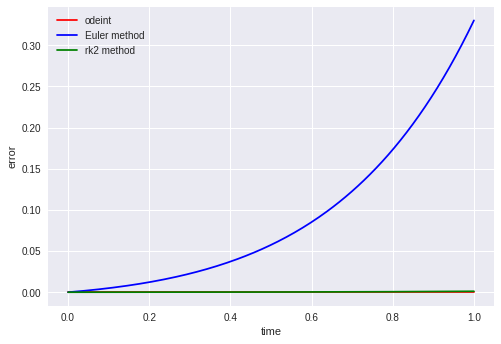

In [48]:
def EulerMethod(f,a,b,c,N):
    x=np.linspace(a,b,N)
    H=x[1]-x[0]
    y=np.empty((N))
    y[0]=c
    for k in range(N-1):
        y[k+1]=y[k]+H*f(x[k],y[k])
    return np.vstack((x,y))


def RK2Method(f,a,b,c,N):
    x=np.linspace(a,b,N)
    H=x[1]-x[0]
    y=np.empty((N))
    y[0]=c
    for k in range(N-1):
        al=f(x[k],y[k])
        y[k+1]=y[k]+H*f(x[k]+H/2,y[k]+(H/2)*al)
    return np.vstack((x,y))


g=lambda x: (x+3)*np.exp(2*x)
a=0
b=1
c=3
N=200
x=np.linspace(a,b,200)


gt=np.array([g(k) for k in x])

print("odeint:")
def model(y,x):
    dydx=2*y+np.exp(2*x)
    return dydx
od=odeint(model,c,x)
plt.subplot(1,3,1)
plt.plot(x,od[:,0])
plt.xlabel('time')
plt.ylabel('odeint(t)')
# plt.show()
# plot results
plt.subplot(1,3,3)
plt.plot(x,gt)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.show()

f=lambda x,y: 2*y +np.exp(2*x)

print("Euler method:")
eu=EulerMethod(f,a,b,c,N)
# plot results
plt.subplot(1,3,1)
plt.plot(x,eu[1])
plt.xlabel('time')
plt.ylabel('Euler Meethod(t)')
# plt.show()
# plot results
plt.subplot(1,3,3)
plt.plot(x,gt)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.show()

print("RK2Method:")
r=RK2Method(f,a,b,c,N)

# plot results
plt.subplot(1,3,1)
plt.plot(x,r[1])
plt.xlabel('time')
plt.ylabel('RK2Method(t)')
# plt.show()
# plot results
plt.subplot(1,3,3)
plt.plot(x,gt)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.show()

print("Absolute error:")
e=np.abs(gt-od[:,0])
eeu=np.abs(gt-eu[1])
erk=np.abs(gt-r[1])
plt.plot(x,e,color="red",label="odeint")
plt.plot(x,eeu,color="blue",label="Euler method")
plt.plot(x,erk,color="green",label="rk2 method")
plt.legend()
plt.xlabel('time')
plt.ylabel('error')
plt.show()


**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,\alpha , \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [38]:
def MatGenerator(a,b,alpha,lambd,beta,N,g):
    H=(b-a)/N
#     u=np.array([alpha])
    x=np.linspace(a,b,N+1)
    v=((H**2)/(lambd**2))*np.array([g(x[i]) for i in range(N+1)])
    v[0]=alpha
    v[N]=beta
    v
#     w=np.array([beta])
#     b=np.vstack(u,np.vstack(u,w))
    A0 = 2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1)-np.eye(N+1,N+1,k=-1)
    A0[0,0]=1
    A0[0,1]=0
    A0[N,N-1]=0
    A0[N,N]=1
#     A0=A0*((lambd**2)/(H**2))
    
    return A0,v

 #plotting numerical solution   
h=lambda x:-4*(1+x)-np.exp(x)
a=0
b=1
lambd=1
alpha=-4
beta=0
N=100
x=np.linspace(0,1,101)
A=MatGenerator(a,b,alpha,lambd,beta,N,h)[0]
b=MatGenerator(a,b,alpha,lambd,beta,N,h)[1]
U= np.linalg.solve(A,b)
print(A)
print(b)

plt.title("curve by Backward euler")
plt.plot(x,U)
plt.xlabel('x')
plt.ylabel('y')
plt.show()  
    
    
    

Quiz 1

In [1]:
#write a function, called sum_prod, that takes  n  and  m 
def sum_prod(n,m=1):
    A=0
    B=1
    for i in range(m,n+1):
        A+=i
        B*=i
    return A,B
sum_prod(10)

(55, 3628800)

In [2]:
#Write a Python function called Facto that calculates the factorial non-negative integer
def Facto(n):
    return sum_prod(n)[1]
Facto(3)

6

In [5]:
#write a function, ListComp that takes a list  L    
def ListComp(L):
    L1=[]
    l=len(L)
    for i in range(l):
        s=[L[i][j] for j in range(len(L[i])-1)]
        L1.append("".join(s))
    L2=[len(L[i]) for i in range(l)]
    L3=[L[i] for i in range(l) if len(L[i])<=3]
    return L1,L2,L3   
#testing
ListComp(["Ala","Aime","Valera","Salomon","Media"])
#alternative


(['Al', 'Aim', 'Valer', 'Salomo', 'Medi'], [3, 4, 6, 7, 5], ['Ala'])

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem =\eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$

In [39]:
def  EulerOdeSys(f,c,t):
    N=len(t)
    M=len(c)
    H=t[1]-t[0]
    Z=np.zeros((N,M))
    Z[0]=c
    for k in range(N-1):
        Z[k+1]=Z[k]+H*f(Z[k],t[k])
    return Z  

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}

In [41]:
def RK4OdeSys(f,c,t):
    N=len(t)
    M=len(c)
    H=t[1]-t[0]
    Z=np.empty((N,M))
    Z[0]=c
    for k in range(N-1):
        k1=f(Z[k],t[k])
        k2=f(Z[k]+H*(k1/2),t[k]+(H/2))
        k3=f(Z[k]+H*(k2/2),t[k]+(H/2))
        k4=f(Z[k]+H*k3,t[k]+H)
        Z[k+1]=Z[k]+(H/6)*(k1+2*k2+2*k3+k4)
    return Z

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [ ]:
def model(v,t):
    x1=v[0]
    x2=v[1]
    x3=v[2]
    #x1,x2,x3=v
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt, dx2dt,dx3dt])
vo=[1,1,1]
t=np.linspace(0,4,200)

# f=model(vo,t)
c=vo
z=EulerOdeSys(model,c,t)
z2=RK4OdeSys(model,c,t)
print("x1=",z2[:,0],"\n\nx2=",z2[:,1],"\n\nx3=",z2[:,2])

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [42]:
def MatGenerator(g,a,b,alph,bet,K,N):
    H=(b-a)/N
    A= -1*np.eye(N-1,N+1)+ 2*np.eye(N-1,N+1,1) -1*np.eye(N-1,N+1,2)    
    A=(K/H**2)*A
    A0=np.zeros((N+1))
    A0[0]=1
    AN=np.zeros((N+1))
    AN[N]=1
    A=np.vstack((np.vstack((A0,A)),AN))
    x=np.linspace(a,b,N+1)
    b=np.array([g(x[i]) for i in range(1,N)])
    b=np.hstack((np.hstack((alph,b)),bet))
    return A,b

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

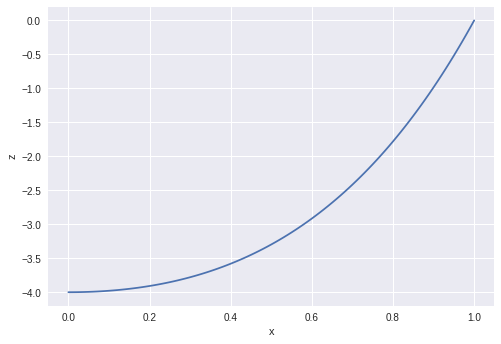

In [43]:
a=0
b=1
K=1
alph=-4
bet=0
N=100
g=lambda x: -4*(1+x)*np.exp(x)
A,b0=MatGenerator(g,a,b,alph,bet,K,N)
z=np.linalg.solve(A,b0)
x=np.linspace(a,b,N+1)
plt.plot(x,z)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

Asignment 2

In [49]:
def Fibonacci(n=2):
    L=np.array([1,2])
    i=2
    while L[i-1]<n:
        L=np.append(L,L[i-2]+L[i-1])
        i+=1
    return L[:i-1]
f=Fibonacci(4000000)
s=np.sum(f[f%2==0])
print("The sum of the even-valued terms in the Fibonacci sequence whose values do not exceed four million is", s)

The sum of the even-valued terms in the Fibonacci sequence whose values do not exceed four million is 4613732


In [50]:
s=""
for i in range(1,1000000//2):
    s+=str(i)
d=np.array([int(s[10**i-1]) for i in range(7)])
p=np.prod(d)
print("𝑑1×𝑑10×𝑑100×𝑑1000×𝑑10000×𝑑100000×𝑑1000000=",p)

𝑑1×𝑑10×𝑑100×𝑑1000×𝑑10000×𝑑100000×𝑑1000000= 210


In [51]:
def LeapYear(y):
    if ((y % 4 == 0) and (y % 100 !=0)) or (y % 400 == 0):
        return True
    else:
        return False
def SunYear(y,d):
    M=np.array([31,28,31,30,31,30,31,31,30,31,30,31])
    if LeapYear(y):
        M[1]+=1
    s=0
    for m in M:
        if d%7==0:
            s+=1
        d+=m
    d=d%7
    return d,s
s=0
d=SunYear(1900,1)[0]  
for year in range(1901,2001):
    d0,s0=SunYear(year,d)
    s+=s0
    d=d0
print("The number of sundays that fell on the first of the month during the twentieth century is",s)

The number of sundays that fell on the first of the month during the twentieth century is 171


In [ ]:
def characterCase(s):
    t=""
    for i in s:
        if i.isupper():
            t+=i.lower()
        elif i.islower():
            t+=i.upper()
    return t
s=input("Enter a string: ")
characterCase(s)

In [ ]:
def UpLow(s):
    up=0
    lc=0
    for i in s:
        if i.isupper():
            up+=1
        elif i.islower():
            lc+=1
    return [up, lc]
s=input("Enter a string: ")
UpLow(s)

In [ ]:
def Name(s):
    if not s[0].isupper():
            return False
    for i in range(1,len(s)):
        if not s[i].islower():
            return False
    return True
s=input("enter a string: ")
Name(s)

In [ ]:
def Ename(L):
    for i in range(len(L)):
        n=L[i].split()
        for j in n:
            if Name(j):
                return i
    return -1
L=["test","this is not","a String that","Have","Name"]
print("The first index where the list element contains a name is",Ename(L))

In [ ]:
def MaxNeg(L):
    M=np.array(L)
    if len(M[M<0])>0:
        return np.max(M[M<0])
    return 0
MaxNeg([1,2,3,5,6])

In [ ]:
def MaxNegRow(M):
    M0=[MaxNeg(M[i]) for i in range(M.shape[0])]
    return np.sum(M0)
M=np.array([[1,2,-5,6,-2,-25],
            [-1,-2,5,-6,2,25],
            [1,2,5,6,5,2]])
MaxNegRow(M)

Logistic Regression

In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset.head()
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

print("Accuracy:",accuracy_score(y_test, y_pred))

Linear regression

In [ ]:
#simple linear regression

df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable

# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)

# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()

Multiple linear regression

In [ ]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

print(maths.info())

corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

maths.sex.unique()#this is a categorical variable

maths.famsize.unique()#this is a categorical variable

# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()


# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

In [1]:
import numpy as np
import pandas as pd

# 1. Data Structure
## 1.1 <b> Pandas Series </b>
- A 1-dimensional labeled array
- Supports many data types
- Axis labels $\rightarrow$ index (get and set values by index label)
- Valid argument to most NumPy
methods

In [2]:
data0 = pd.Series(data = [1,2,3.,4,5,6,7,8])
data0

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [3]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(data = [1,2,3.,4,5,6,7,8,9], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'])
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

In [4]:
data1.index
data1[4]
data1[[2,4,5]]
data1['a']
# 'a' in data1
# data1*3
# data1**3
# data1/2
# data1

a    1.0
a    9.0
dtype: float64

##  1.2. <b>DataFrame </b>
- A 2-dimensional labeled data
structure
- A dictionary of Series objects
    - Columns can be of potentially
different types
- Optionally parameters for fine-tuning:
    - index (row labels)
    - columns (column labels)

Pandas provides many constructors to create DataFrames!

In [5]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [6]:
data2.index
data2.columns

Index(['GradeS1', 'GradeS2'], dtype='object')

In [7]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics'])#Create another data frame with some index of data2
d

,GradeS1,GradeS2
Maths,70.0,90.0
Physics,98.0,88.0
Economics,NaN,76.0


In [8]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics', 'elvira'], 
                columns= ('Grade12', 'GradeS2','GradeS1'))
d

,Grade12,GradeS2,GradeS1
Maths,NaN,90.0,70.0
Physics,NaN,88.0,98.0
Economics,NaN,76.0,NaN
elvira,NaN,NaN,NaN


# 2. Reading and Writing Data

## 2.1 <b> pandas: Data Ingestion (Reading) </b>
- Functions such as <font color = red> ‘read_excel’, ‘read_csv’, 'read_json', 'read_html', 'read_sql_query', 'read_sql_table' </b>, etc.

<b> Syntax: pandas.function(file_directory) </b>

In [10]:
ddat = pd.read_excel('Climate_Dynamics.xlsx')
ddat
ddat.head()
ddat.head(3)
ddat.tail()

,Unnamed: 0,Quiz 1,Unnamed: 2,Quiz 2,Unnamed: 4,Bonus,Assignment 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Assignment 2,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Extended Quiz,Final Mark,Grade,Unnamed: 18
29,Remy Twiringiyimana,8.0,80,8.0,80,3.0,9.5,28.5,54.0,92,18.0,20.0,28.0,28.0,96,92.0,90.8,Distinction,Remy Twiringiyimana
30,Romain Akpahou,8.0,80,8.0,80,10.0,9.5,29.0,55.0,93.5,20.0,20.0,17.0,30.0,91,90.0,89.35,Distinction,Romain Akpahou
31,Yao Gahounzo,6.0,60,6.0,60,10.0,9.5,29.0,55.0,93.5,15.0,20.0,28.0,30.0,97,86.0,86.35,Distinction,Yao Gahounzo
32,Zeinab Hesham Abd El-ghany,9.0,90,9.0,90,17.0,9.5,29.0,56.0,94.5,20.0,20.0,17.0,30.0,91,77.0,89.05,Distinction,Zeinab Hesham Abd El-ghany
33,Titus,7.0,70,7.0,70,22.0,10.0,29.5,56.0,95.5,15.0,20.0,17.0,30.0,91,89.0,87.75,Distinction,Titus


In [12]:
ddatt = pd.ExcelFile('DefenseSchedule2020forTutors.xlsx')
sheet1_df = pd.read_excel(ddatt, 'For Examiners ')
sheet2_df = pd.read_excel(ddatt, 'For Tutors ')
sheet1_df.head(2)
# sheet2_df.head(3)

,Unnamed: 0,Wednesday 3rd June,Examiner,Thursday 4th June,Unnamed: 4,Friday 5th June,Unnamed: 6,Unnamed: 7,Monday 8th June,Unnamed: 9,Tuesday 9th June,Unnamed: 11,Wednesday 10th June,Unnamed: 13
0,09:00:00,Angela Nyangate John,Patrice Takam,Yao Gahounzo,Stive,NaN,NaN,NaN,Patrick Pam Peter,Hove,Zeinab,Bourgeois,Leontine,Bemsibom
1,09:30:00,Mohamed Maysara Hassan Yagob,Antoine Bogso,Martin De Pores Barindirimana,Denis Ndanguza,Mulengo Kanzoka,Lydie (UR),NaN,Remy Mugenda Ineza,Hove,Dimitri,Erick Tetsadjio,Jean de Dieu,Bamba


In [13]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")#JavaScript Object Notation
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


In [15]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [16]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
data.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


## 2.2. Data writing

Save the dataframe in the current directory

In [17]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
#==========================================
# index = False parameter will not write the index values, default is True
#data2.to_csv('data_new.csv', index=True)
#data2.to_csv('data_new.txt', sep='\t', index=True)
# data2.to_excel('data_new.xlsx',sheet_name='Sheet1', index = False)
data2.head()

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0


<b>Create a folder in the current directory and save the dataframe inside</b>

In [18]:
#==============================================
# create a folder if it not exists
Name_of_folder = 'folder 1'
import os
if not os.path.exists(Name_of_folder):
    os.makedirs(Name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data2.to_csv(Name_of_folder+'/data_new.csv', index=False)
# data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

In [19]:
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

# 3. Basic Statistics Summary
<b> pandas in Descriptive Statistics </b>
Functions such as 'describe()', 'corr()', 'min()', 'max()', 'mode()', 'median()', 'std()', etc.

<b> Syntax : data_frame.function() </b>

In [20]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = ["Pass","Pass","Pass","Pass","Pass","Pass","Fail"], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
print(data2)
data2.describe()

           GradeS1 GradeS2
Art           50.0     NaN
Biology       84.0    Pass
Economics      NaN    Pass
Finance        NaN    Pass
Geology        NaN    Fail
Maths         70.0    Pass
Physics       98.0    Pass
Sport         67.0     NaN
chemistry      NaN    Pass


,GradeS1
count,5.000000
mean,73.800000
std,18.143869
min,50.000000
25%,67.000000
50%,70.000000
75%,84.000000
max,98.000000


In [21]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
print(data2)
data2.describe()

           GradeS1  GradeS2
Art           50.0      NaN
Biology       84.0     70.0
Economics      NaN     76.0
Finance        NaN     77.0
Geology        NaN     87.0
Maths         70.0     90.0
Physics       98.0     88.0
Sport         67.0      NaN
chemistry      NaN     78.0


,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [22]:
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [23]:
data2.describe()

,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [24]:
data2.loc['Maths',:].describe()

count     2.000000
mean     80.000000
std      14.142136
min      70.000000
25%      75.000000
50%      80.000000
75%      85.000000
max      90.000000
Name: Maths, dtype: float64

In [25]:
data2.corr()

,GradeS1,GradeS2
GradeS1,1.000000,-0.090784
GradeS2,-0.090784,1.000000


In [26]:
data2.max()
data2.loc['Maths',:].max()

90.0

In [27]:
data2.cov()

,GradeS1,GradeS2
GradeS1,329.2,-14.000000
GradeS2,-14.0,56.142857


In [28]:
data2.std()

GradeS1    18.143869
GradeS2     7.492854
dtype: float64

In [29]:
data2.mean()

GradeS1    73.800000
GradeS2    80.857143
dtype: float64

# 4. Viewing Data

In [30]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

,Col1,Col2,Col3
a,1,4,Euler
b,-2,-3,A
c,3,7,A
d,1,8,Euler
e,5,9,A
f,6,5,A
g,1,6,RK4
h,-3,4,A
i,1,-2,Euler
j,1,2,RK4


## 4.1 The characteristics of a dataframe

In [31]:
df.columns       #Get column names 
df.index         # Get dataframe index 
df.values        # Get values
df.dtypes        # Get column datatypes
df.shape



(10, 3)

## 4.2 Access, slice and update the values of a dataframe
To access, slice or update the value of a dataframe one can use the methods <b>loc or iloc</b>.

<b>loc</b> gets rows (or columns) with particular labels from the index. <b>iloc</b> gets rows (or columns) at particular positions in the index (so it only takes integers). 
### 4.2.1 Selecting pandas data using “iloc”

The <b>iloc</b> indexer for Pandas Dataframe is used for <b>integer-location based indexing / selection by position</b>.

The iloc indexer syntax is 
$$\text{data.iloc[<row selection>, <column selection>]},$$ 

which is sure to be a source of confusion for R users. <b>iloc</b> in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (<b>data.shape[0]</b>)  and <b>iloc[...]</b> allows selections based on these numbers. The same applies for columns (ranging from 0 to <b>data.shape[1]</b>)

There are two “arguments” to iloc – a row selector, and a column selector.  For example:

In [32]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [33]:
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [34]:
# # # Single selections using iloc and DataFrame
# # # Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# # # Columns:
data.iloc[:,0] # first column of data frame (first_name)
# data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

0      969
1      207
2      824
3      772
4       48
      ... 
495    188
496     86
497    584
498    548
499     74
Name: id, Length: 500, dtype: int64

<b>Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.</b>


In [35]:
data.iloc[:,[-1]] # last column of data frame (id)

,id
0,969
1,207
2,824
3,772
4,48
...,...
495,188
496,86
497,584
498,548


Multiple columns and rows can be selected together using the <b>.iloc</b> indexer.

In [36]:
# # Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


,county,postal,phone1
0,Kent,CT2 7PP,01835-703597
1,Buckinghamshire,HP11 2AX,01937-864715
2,Bournemouth,BH6 3BE,01347-368222
3,Lincolnshire,DN36 5RP,01912-771311
4,West Midlands,B70 9DT,01547-429341


### 4.2.2. Selecting pandas data using “loc”

The Pandas loc indexer can be used with DataFrames for two different use cases:

    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: 
$$\text{data.loc[<row selection>, <column selection>]}$$

#### a. Label-based / Index-based indexing using .loc

Selections using the loc method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <b>df.set_index()</b>, the .loc method directly selects based on index values of any rows. For example, setting the index of our test data frame to the persons “last_name”:

In [37]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [38]:
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
data.index

RangeIndex(start=0, stop=500, step=1)

In [39]:
data1 = data.set_index("last_name", inplace=False)#set the column "last_name" as the index of our dataframe
data1.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [40]:
data1.index

Index(['Tomkiewicz', 'Zigomalas', 'Andrade', 'Mcwalters', 'Veness', 'Rampy',
       'Grasmick', 'Hisaw', 'Manzella', 'Klapec',
       ...
       'Ausdemore', 'Stancil', 'Fiorino', 'Manciel', 'Katie', 'Veit',
       'Euresti', 'Brenning', 'Keeny', 'Richan'],
      dtype='object', name='last_name', length=500)

Now with the index set, we can directly select rows for different “last_name” values using <b>.loc[<label>]</b>  – either singly, or in multiples. For example:

In [41]:
data1.loc['Veness']
# data1.loc[['Andrade','Veness']]

first_name                              Tyisha
company_name                    Champagne Room
address                      5396 Forth Street
city                Greets Green and Lyng Ward
county                           West Midlands
postal                                 B70 9DT
phone1                            01547-429341
phone2                            01290-367248
email                tyisha.veness@hotmail.com
web             http://www.champagneroom.co.uk
id                                          48
Name: Veness, dtype: object

<b> Selecting single or multiple rows using .loc index selections with pandas. Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.</b>

In [42]:
data1.loc[['Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Select columns with <b>.loc</b> using the names of the columns.

In [43]:
data1.loc[['Andrade','Veness'], ['first_name','address','city']]

,first_name,address,city
last_name,,,
Andrade,France,8 Moor Place,East Southbourne and Tuckton W
Veness,Tyisha,5396 Forth Street,Greets Green and Lyng Ward


When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

You can select ranges of index labels – the selection <b>data.loc['Bruch':'Julio']</b> will return all rows in the data frame between the index entries for <b>'Bruch'</b> and <b>'Julio'</b>. The following examples should now make sense:

In [44]:
# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'
data1.loc[['Andrade', 'Veness'], 'city':'email']
# # # Select all rows between 'Andrade' and 'Veness', with just 'first_name', 'address' and 'city' columns
data1.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
# # # Select all rows between 'Andrade' and 'Veness', with all columns between 'city' and 'email' 
data1.loc['Andrade':'Veness', 'city':'email']

,city,county,postal,phone1,phone2,email
last_name,,,,,,
Andrade,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com
Mcwalters,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com
Veness,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com


Note that in the last example, <b>data.loc[207]</b> (the row with index value 207) is not equal to <b>data.iloc[207]</b> (the 207th row in the data)

In [45]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# Change the index to be based on the 'id' column
data.set_index('id', inplace=True)
print(data.shape)
data.index.unique().shape
data.head()

(500, 11)


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
969,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
824,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
772,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
48,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [46]:
i = data.index[1]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i]]

i =  207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
207,Eva,Joulwan,Central Hrdwr & Elec Corp,7 Lear Rd,Stroud,Hampshire,GU32 3PQ,01779-720349,01961-802899,eva.joulwan@gmail.com,http://www.centralhrdwreleccorp.co.uk
207,Allene,Burau,Allied Plastics,8 Barlow St #6,Barlow,Derbyshire,S18 7TH,01731-825958,01260-963065,allene.burau@hotmail.com,http://www.alliedplastics.co.uk


In [47]:
i = data.index[1]
b= data.index[2]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i:b]]#error because of the label i is not unique

SyntaxError: invalid syntax (Temp/ipykernel_4032/2634612698.py, line 5)

In [48]:
print(i)
data.iloc[[i]]#return the row of index 207.

207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
876,Madalyn,Dubberly,L & M Industrial Chemicals Inc,1 Lower Burlington St,Northfleet South Ward,Kent,DA11 8RN,01974-720949,01910-745476,madalyn.dubberly@gmail.com,http://www.lmindustrialchemicalsinc.co.uk


### b. Boolean / Logical indexing using .loc

Conditional selections with boolean arrays using $\text{data.loc[<selection>]}$ is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the <b>.loc</b> indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

For example, the statement $$\text{data[‘first_name’] == ‘Antonio’}$$ produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the <b>.loc</b> indexer as so:

In [49]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# data.set_index("last_name", inplace=True)

# data.loc[data['first_name'] == 'Antonio']

# data.loc[data["county"]=="Newport"]
data.loc[:,["county"]]

,county
0,Kent
1,Buckinghamshire
2,Bournemouth
3,Lincolnshire
4,West Midlands
...,...
495,Greater London
496,Highland
497,South Yorkshire
498,County Durham


In [50]:
#command line to extract the column "county" from the dataframe data.
data.county
data["county"]
data.loc[:,"county"]
data.loc[:,["county"]]

,county
0,Kent
1,Buckinghamshire
2,Bournemouth
3,Lincolnshire
4,West Midlands
...,...
495,Greater London
496,Highland
497,South Yorkshire
498,County Durham


In [51]:
data.county.unique().size

102

As before, a second argument can be passed to .loc to select particular columns out of the data frame. Again, columns are referred to by name for the loc indexer and can be a single string, a list of columns, or a slice “:” operation.

In [52]:
data.loc[data['first_name'] == 'Antonio', ['email', 'address','city']]

,email,address,city
272,antonio.villamarin@gmail.com,353 Standish St #8264,Little Parndon and Hare Street
285,antonio_glasford@glasford.co.uk,425 Howley St,Gaer Community
427,antonio.heilig@gmail.com,35 Elton St #3,Ipplepen


Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:

In [53]:
data.loc[data['first_name'] == 'Antonio', 'email']
data.loc[data['first_name'] == 'Antonio', ['email']]

,email
272,antonio.villamarin@gmail.com
285,antonio_glasford@glasford.co.uk
427,antonio.heilig@gmail.com


# 5. Basic Operations

## 5.1 Sorting values in the DataFrame

In [54]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #=============================================================
# #Create a new columns called 'X' and 'Y' in the dataframe df
df['X'] = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
df['Y'] = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
# #============================================================
# df
df.loc['z'] = [1,2,3,4,5]
# #df

df


,Col1,Col2,Col3,X,Y
a,1,4,Euler,A,A
b,-2,-3,A,A,B
c,3,7,A,A,A
d,1,8,Euler,A,B
e,5,9,A,A,A
f,6,5,A,B,B
g,1,6,RK4,B,A
h,-3,4,A,B,B
i,1,-2,Euler,B,A
j,1,2,RK4,B,B


In [55]:
df.sort_values(by =['Col1'],ascending=[True], inplace=True)# Sort DataFrame 
df.sort_values(by =['Col1', 'Col2'],ascending=[False,False], inplace=True)# Sort DataFrame
df

,Col1,Col2,Col3,X,Y
f,6,5,A,B,B
e,5,9,A,A,A
c,3,7,A,A,A
d,1,8,Euler,A,B
g,1,6,RK4,B,A
a,1,4,Euler,A,A
j,1,2,RK4,B,B
z,1,2,3,4,5
i,1,-2,Euler,B,A
b,-2,-3,A,A,B


## 5.2. Replace NaN Values in Pandas DataFrame

Depending on the scenario, you may use either of the 4 methods below in order to replace NaN values with zeros in Pandas DataFrame:

let us consider the following dataframe

In [56]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology']),
        'GradeS3': pd.Series(data = [69,75,73,87], 
                              index = ['Maths', 'chemistry', 'Economics', 'Geology']),
        'GradeS4': pd.Series(data = [90,70,88,78,76,77,87,98,90], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology','Art', 'Sport'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


1. For a single column or entire datafame using NumPy: 

In [57]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 30 in the column 'GradeS2' of the dataframe using numpy
data3['GradeS2'].replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [58]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using numpy
data3.replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,30.0,98
Biology,84.0,70.0,30.0,70
Economics,30.0,76.0,73.0,76
Finance,30.0,77.0,30.0,77
Geology,30.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,30.0,88
Sport,67.0,30.0,30.0,90
chemistry,30.0,78.0,75.0,78


2. For a single column or entire datafame using Pandas: 

In [59]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' using Pandas
data3['GradeS2'].fillna(30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [60]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using Pandas
data3.fillna(3, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,3.0,3.0,98
Biology,84.0,70.0,3.0,70
Economics,3.0,76.0,73.0,76
Finance,3.0,77.0,3.0,77
Geology,3.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,3.0,88
Sport,67.0,3.0,3.0,90
chemistry,3.0,78.0,75.0,78


Replace missing values with last valid observation (useful in time series
data). For example, temperature does not change drastically compared to previous observation. So better approach is to fill NA is to forward or backward fill. There are mainly two methods available

In [61]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3['GradeS1'].fillna(method= 'bfill', inplace=True)
##Note that the last NaN was not replaced because there is no next value for him


##Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3.fillna(method= 'bfill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,78.0,75.0,90
chemistry,NaN,78.0,75.0,78


In [62]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by previous value in the column 'GradeS2' of the dataframe using Pandas
data3['GradeS2'].fillna(method= 'ffill', inplace=True)
##Note that the first NaN was not replaced because there is no next value for him


##Replace NaN by previous value in the entire dataframe using Pandas
data3.fillna(method= 'ffill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,84.0,76.0,73.0,76
Finance,84.0,77.0,73.0,77
Geology,84.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,69.0,88
Sport,67.0,88.0,69.0,90
chemistry,67.0,78.0,75.0,78


## 5.3. Delete NaN Values with Zeros in Pandas DataFrame

In [63]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all rows that contain NaN
data3.dropna(axis=0, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Maths,70.0,90.0,69.0,90


In [64]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all columns that contain NaN
data3.dropna(axis=1, inplace=True)
data3

,GradeS4
Art,98
Biology,70
Economics,76
Finance,77
Geology,87
Maths,90
Physics,88
Sport,90
chemistry,78


## 5.4. Grouping
Grouping involves one or more of the following steps:
- Splitting the data into groups based on some criteria,
- Applying a function to each group independently,
- Combining the results into a data structure

Let us consider the following data

In [65]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane','jack', 'jane'],
                   'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK','SFO', 'CA'],
                   'Grade':['A','A','B','A','C','B','C','A'],
                   'Age' : np.random.randint(24, 50, size=8)})
df

,Name,State,Grade,Age
0,jack,SFO,A,36
1,jane,SFO,A,49
2,jack,NYK,B,35
3,jane,CA,A,48
4,jack,NYK,C,38
5,jane,NYK,B,29
6,jack,SFO,C,30
7,jane,CA,A,27


Find max age by Name / State

In [66]:
df.groupby(['Name','State']).max()

Grade  Age
Name State           
jack NYK       C   38
     SFO       C   36
jane CA        A   48
     NYK       B   29
     SFO       A   49

# 6. Load datasets from seaborn

The library seaborn gives you a sample of datasets to practice

In [ ]:
import seaborn as sns
print(sns.get_dataset_names())


In [ ]:
tips = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
cars = sns.load_dataset("car_crashes")

# 6. Plot of a dataframe

In [ ]:
import pandas as pd

download_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")

df = pd.read_csv(download_url)
df.head()

Your dataset contains some columns related to the earnings of graduates in each major:

- "Median" is the median earnings of full-time, year-round workers.
- "P25th" is the 25th percentile of earnings.
- "P75th" is the 75th percentile of earnings.
- "Rank" is the major’s rank by median earnings.

Let’s start with a plot displaying these columns. First, you need to set up your Jupyter Notebook to display plots with the **%matplotlib inline** magic command.

In [ ]:
%matplotlib inline  

In [ ]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"]);

To discover these differences, you’ll use several other types of plots.

.plot() has several optional parameters. Most notably, the **kind** parameter accepts eleven different string values and determines which kind of plot you’ll create:

- "area" is for area plots.
- "bar" is for vertical bar charts.
- "barh" is for horizontal bar charts.
- "box" is for box plots.
- "hexbin" is for hexbin plots.
- "hist" is for histograms.
- "kde" is for kernel density estimate charts.
- "density" is an alias for "kde".
- "line" is for line graphs.
- "pie" is for pie charts.
- "scatter" is for scatter plots.

The default value is "line". 

In [ ]:
df.plot.scatter?

You can use both pyplot.plot() and df.plot() to produce the same graph from columns of a DataFrame object. However, if you already have a DataFrame instance, then df.plot() offers cleaner syntax than pyplot.plot().

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["Rank"], df["P75th"]);

In [ ]:
df.plot(x="Rank", y="P75th")

In [4]:
import numpy as np
import pandas as pd

# 1. Data Structure
## 1.1 <b> Pandas Series </b>
- A 1-dimensional labeled array
- Supports many data types
- Axis labels $\rightarrow$ index (get and set values by index label)
- Valid argument to most NumPy
methods

In [5]:
data0 = pd.Series(data = [1,2,3.,4,5,6,7,8])
data0

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [6]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(data = [1,2,3.,4,5,6,7,8,9], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'])
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

In [7]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'],[1,2,3.,4,5,6,7,8,9])
data1

1.0    a
2.0    b
3.0    c
4.0    d
5.0    e
6.0    f
7.0    g
8.0    h
9.0    a
dtype: object

In [8]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'],data = [1,2,3.,4,5,6,7,8,9])
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

In [21]:
data1.index
data1[4]
data1[[2,4,5]]
data1['a']
2 in data1
data1*3
data1**3
data1/2
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

##  1.2. <b>DataFrame </b>
- A 2-dimensional labeled data
structure
- A dictionary of Series objects
    - Columns can be of potentially
different types
- Optionally parameters for fine-tuning:
    - index (row labels)
    - columns (column labels)

Pandas provides many constructors to create DataFrames!

In [27]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [35]:
data2.index
w = data2.loc[["Finance"]]
w

,GradeS1,GradeS2
Finance,NaN,77.0


In [38]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Chemistry'])#Create another data frame with some index of data2
d

,GradeS1,GradeS2
Maths,70.0,90.0
Physics,98.0,88.0
Chemistry,NaN,NaN


In [40]:
d.loc['Chemistry'][1] = 56
d

,GradeS1,GradeS2
Maths,70.0,90.0
Physics,98.0,88.0
Chemistry,56.0,56.0


In [41]:
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [36]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics', 'elvira'], 
                columns= ('Grade12', 'GradeS2','GradeS1'))
d

,Grade12,GradeS2,GradeS1
Maths,NaN,90.0,70.0
Physics,NaN,88.0,98.0
Economics,NaN,76.0,NaN
elvira,NaN,NaN,NaN


# 2. Reading and Writing Data

## 2.1 <b> pandas: Data Ingestion (Reading) </b>
- Functions such as <font color = red> ‘read_excel’, ‘read_csv’, 'read_json', 'read_html', 'read_sql_query', 'read_sql_table' </b>, etc.

<b> Syntax: pandas.function(file_directory) </b>

In [46]:
d=pd.read_excel("data1.xlsx")
d.tail()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [37]:
ddat = pd.read_excel('Climate_Dynamics.xlsx')
ddat
ddat.head()
ddat.head(3)
ddat.tail()

,Unnamed: 0,Quiz 1,Unnamed: 2,Quiz 2,Unnamed: 4,Bonus,Assignment 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Assignment 2,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Extended Quiz,Final Mark,Grade,Unnamed: 18
29,Remy Twiringiyimana,8.0,80,8.0,80,3.0,9.5,28.5,54.0,92,18.0,20.0,28.0,28.0,96,92.0,90.8,Distinction,Remy Twiringiyimana
30,Romain Akpahou,8.0,80,8.0,80,10.0,9.5,29.0,55.0,93.5,20.0,20.0,17.0,30.0,91,90.0,89.35,Distinction,Romain Akpahou
31,Yao Gahounzo,6.0,60,6.0,60,10.0,9.5,29.0,55.0,93.5,15.0,20.0,28.0,30.0,97,86.0,86.35,Distinction,Yao Gahounzo
32,Zeinab Hesham Abd El-ghany,9.0,90,9.0,90,17.0,9.5,29.0,56.0,94.5,20.0,20.0,17.0,30.0,91,77.0,89.05,Distinction,Zeinab Hesham Abd El-ghany
33,Titus,7.0,70,7.0,70,22.0,10.0,29.5,56.0,95.5,15.0,20.0,17.0,30.0,91,89.0,87.75,Distinction,Titus


In [38]:
ddatt = pd.ExcelFile('DefenseSchedule2020forTutors.xlsx')
sheet1_df = pd.read_excel(ddatt, 'For Examiners ')
sheet2_df = pd.read_excel(ddatt, 'For Tutors ')
sheet1_df.head(2)
# sheet2_df.head(3)

,Unnamed: 0,Wednesday 3rd June,Examiner,Thursday 4th June,Unnamed: 4,Friday 5th June,Unnamed: 6,Unnamed: 7,Monday 8th June,Unnamed: 9,Tuesday 9th June,Unnamed: 11,Wednesday 10th June,Unnamed: 13
0,09:00:00,Angela Nyangate John,Patrice Takam,Yao Gahounzo,Stive,NaN,NaN,NaN,Patrick Pam Peter,Hove,Zeinab,Bourgeois,Leontine,Bemsibom
1,09:30:00,Mohamed Maysara Hassan Yagob,Antoine Bogso,Martin De Pores Barindirimana,Denis Ndanguza,Mulengo Kanzoka,Lydie (UR),NaN,Remy Mugenda Ineza,Hove,Dimitri,Erick Tetsadjio,Jean de Dieu,Bamba


In [47]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")#JavaScript Object Notation
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


In [40]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [41]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
data.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


## 2.2. Data writing

Save the dataframe in the current directory

In [92]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
#==========================================
# index = False parameter will not write the index values, default is True
#data2.to_csv('data_new.csv', index=True)
#data2.to_csv('data_new.txt', sep='\t', index=True)
# data2.to_excel('data_new.xlsx',sheet_name='Sheet1', index = False)
data2.head()

,GradeS1,GradeS2
Geology,NaN,Fail
Physics,98.0,Pass
Biology,84.0,Pass


<b>Create a folder in the current directory and save the dataframe inside</b>

In [48]:
#==============================================
# create a folder if it not exists
Name_of_folder = 'folder 1'
import os
if not os.path.exists(Name_of_folder):
    os.makedirs(Name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data2.to_csv(Name_of_folder+'/data_new.csv', index=False)
# data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

In [44]:
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

# 3. Basic Statistics Summary
<b> pandas in Descriptive Statistics </b>
Functions such as 'describe()', 'corr()', 'min()', 'max()', 'mode()', 'median()', 'std()', etc.

<b> Syntax : data_frame.function() </b>

In [51]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = ["Pass","Pass","Pass","Pass","Pass","Pass","Fail"], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
print(data2)
data2.describe()
# data2.info()

           GradeS1 GradeS2
Art           50.0     NaN
Biology       84.0    Pass
Economics      NaN    Pass
Finance        NaN    Pass
Geology        NaN    Fail
Maths         70.0    Pass
Physics       98.0    Pass
Sport         67.0     NaN
chemistry      NaN    Pass


,GradeS1
count,5.000000
mean,73.800000
std,18.143869
min,50.000000
25%,67.000000
50%,70.000000
75%,84.000000
max,98.000000


In [98]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
print(data2)
data2.describe()

           GradeS1  GradeS2
Art           50.0      NaN
Biology       84.0     70.0
Economics      NaN     76.0
Finance        NaN     77.0
Geology        NaN     87.0
Maths         70.0     90.0
Physics       98.0     88.0
Sport         67.0      NaN
chemistry      NaN     78.0


,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [ ]:
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [ ]:
data2.describe()

,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [99]:
data2.loc['Maths',:].describe()

count     2.000000
mean     80.000000
std      14.142136
min      70.000000
25%      75.000000
50%      80.000000
75%      85.000000
max      90.000000
Name: Maths, dtype: float64

In [101]:
data2.corr()

,GradeS1,GradeS2
GradeS1,1.000000,-0.090784
GradeS2,-0.090784,1.000000


In [106]:
data2.max()
data2.loc['Maths',:].max()

90.0

In [103]:
data2.cov()

,GradeS1,GradeS2
GradeS1,329.2,-14.000000
GradeS2,-14.0,56.142857


In [104]:
data2.std()

GradeS1    18.143869
GradeS2     7.492854
dtype: float64

In [105]:
data2.mean()

GradeS1    73.800000
GradeS2    80.857143
dtype: float64

# 4. Viewing Data

In [109]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

,Col1,Col2,Col3
a,1,4,Euler
b,-2,-3,A
c,3,7,A
d,1,8,Euler
e,5,9,A
f,6,5,A
g,1,6,RK4
h,-3,4,A
i,1,-2,Euler
j,1,2,RK4


## 4.1 The characteristics of a dataframe

In [115]:
df.columns       #Get column names 
df.index         # Get dataframe index 
df.values        # Get values
df.dtypes        # Get column datatypes
df.shape



(10, 3)

## 4.2 Access, slice and update the values of a dataframe
To access, slice or update the value of a dataframe one can use the methods <b>loc or iloc</b>.

<b>loc</b> gets rows (or columns) with particular labels from the index. <b>iloc</b> gets rows (or columns) at particular positions in the index (so it only takes integers). 
### 4.2.1 Selecting pandas data using “iloc”

The <b>iloc</b> indexer for Pandas Dataframe is used for <b>integer-location based indexing / selection by position</b>.

The iloc indexer syntax is 
$$\text{data.iloc[<row selection>, <column selection>]},$$ 

which is sure to be a source of confusion for R users. <b>iloc</b> in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (<b>data.shape[0]</b>)  and <b>iloc[...]</b> allows selections based on these numbers. The same applies for columns (ranging from 0 to <b>data.shape[1]</b>)

There are two “arguments” to iloc – a row selector, and a column selector.  For example:

In [120]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [121]:
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [125]:
# # # Single selections using iloc and DataFrame
# # # Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# # # Columns:
data.iloc[:,0] # first column of data frame (first_name)
# data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

0      969
1      207
2      824
3      772
4       48
      ... 
495    188
496     86
497    584
498    548
499     74
Name: id, Length: 500, dtype: int64

<b>Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.</b>


In [127]:
data.iloc[:,[-1]] # last column of data frame (id)

,id
0,969
1,207
2,824
3,772
4,48
...,...
495,188
496,86
497,584
498,548


Multiple columns and rows can be selected together using the <b>.iloc</b> indexer.

In [49]:
# # Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


,county,postal,phone1
0,Kent,CT2 7PP,01835-703597
1,Buckinghamshire,HP11 2AX,01937-864715
2,Bournemouth,BH6 3BE,01347-368222
3,Lincolnshire,DN36 5RP,01912-771311
4,West Midlands,B70 9DT,01547-429341


### 4.2.2. Selecting pandas data using “loc”

The Pandas loc indexer can be used with DataFrames for two different use cases:

    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: 
$$\text{data.loc[<row selection>, <column selection>]}$$

#### a. Label-based / Index-based indexing using .loc

Selections using the loc method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <b>df.set_index()</b>, the .loc method directly selects based on index values of any rows. For example, setting the index of our test data frame to the persons “last_name”:

In [141]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [142]:
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
data.index

RangeIndex(start=0, stop=500, step=1)

In [153]:
data1 = data.set_index("last_name", inplace=False)#set the column "last_name" as the index of our dataframe
data1.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [154]:
data1.index

Index(['Tomkiewicz', 'Zigomalas', 'Andrade', 'Mcwalters', 'Veness', 'Rampy',
       'Grasmick', 'Hisaw', 'Manzella', 'Klapec',
       ...
       'Ausdemore', 'Stancil', 'Fiorino', 'Manciel', 'Katie', 'Veit',
       'Euresti', 'Brenning', 'Keeny', 'Richan'],
      dtype='object', name='last_name', length=500)

Now with the index set, we can directly select rows for different “last_name” values using <b>.loc[<label>]</b>  – either singly, or in multiples. For example:

In [157]:
data1.loc['Veness']
# data1.loc[['Andrade','Veness']]

first_name                              Tyisha
company_name                    Champagne Room
address                      5396 Forth Street
city                Greets Green and Lyng Ward
county                           West Midlands
postal                                 B70 9DT
phone1                            01547-429341
phone2                            01290-367248
email                tyisha.veness@hotmail.com
web             http://www.champagneroom.co.uk
id                                          48
Name: Veness, dtype: object

<b> Selecting single or multiple rows using .loc index selections with pandas. Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.</b>

In [159]:
data1.loc[['Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Select columns with <b>.loc</b> using the names of the columns.

In [160]:
data1.loc[['Andrade','Veness'], ['first_name','address','city']]

,first_name,address,city
last_name,,,
Andrade,France,8 Moor Place,East Southbourne and Tuckton W
Veness,Tyisha,5396 Forth Street,Greets Green and Lyng Ward


When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

You can select ranges of index labels – the selection <b>data.loc['Bruch':'Julio']</b> will return all rows in the data frame between the index entries for <b>'Bruch'</b> and <b>'Julio'</b>. The following examples should now make sense:

In [164]:
# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'
data1.loc[['Andrade', 'Veness'], 'city':'email']
# # # Select all rows between 'Andrade' and 'Veness', with just 'first_name', 'address' and 'city' columns
data1.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
# # # Select all rows between 'Andrade' and 'Veness', with all columns between 'city' and 'email' 
data1.loc['Andrade':'Veness', 'city':'email']

,city,county,postal,phone1,phone2,email
last_name,,,,,,
Andrade,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com
Mcwalters,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com
Veness,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com


Note that in the last example, <b>data.loc[207]</b> (the row with index value 207) is not equal to <b>data.iloc[207]</b> (the 207th row in the data)

In [185]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# Change the index to be based on the 'id' column
data.set_index('id', inplace=True)
print(data.shape)
data.index.unique().shape
data.head()

(500, 11)


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
969,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
824,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
772,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
48,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [186]:
i = data.index[1]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i]]

i =  207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
207,Eva,Joulwan,Central Hrdwr & Elec Corp,7 Lear Rd,Stroud,Hampshire,GU32 3PQ,01779-720349,01961-802899,eva.joulwan@gmail.com,http://www.centralhrdwreleccorp.co.uk
207,Allene,Burau,Allied Plastics,8 Barlow St #6,Barlow,Derbyshire,S18 7TH,01731-825958,01260-963065,allene.burau@hotmail.com,http://www.alliedplastics.co.uk


In [188]:
i = data.index[1]
b= data.index[2]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i:b]]#error because of the label i is not unique

SyntaxError: invalid syntax (Temp/ipykernel_23564/2634612698.py, line 5)

In [190]:
print(i)
data.iloc[[i]]#return the row of index 207.

207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
876,Madalyn,Dubberly,L & M Industrial Chemicals Inc,1 Lower Burlington St,Northfleet South Ward,Kent,DA11 8RN,01974-720949,01910-745476,madalyn.dubberly@gmail.com,http://www.lmindustrialchemicalsinc.co.uk


### b. Boolean / Logical indexing using .loc

Conditional selections with boolean arrays using $\text{data.loc[<selection>]}$ is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the <b>.loc</b> indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

For example, the statement $$\text{data[‘first_name’] == ‘Antonio’}$$ produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the <b>.loc</b> indexer as so:

In [197]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# data.set_index("last_name", inplace=True)

# data.loc[data['first_name'] == 'Antonio']

# data.loc[data["county"]=="Newport"]
data.loc[:,["county"]]

,county
0,Kent
1,Buckinghamshire
2,Bournemouth
3,Lincolnshire
4,West Midlands
...,...
495,Greater London
496,Highland
497,South Yorkshire
498,County Durham


In [ ]:
#command line to extract the column "county" from the dataframe data.
data.county
data["county"]
data.loc[:,"county"]
data.loc[:,["county"]]

In [200]:
data.county.unique().size

102

As before, a second argument can be passed to .loc to select particular columns out of the data frame. Again, columns are referred to by name for the loc indexer and can be a single string, a list of columns, or a slice “:” operation.

In [203]:
data.loc[data['first_name'] == 'Antonio', ['email', 'address','city']]

,email,address,city
272,antonio.villamarin@gmail.com,353 Standish St #8264,Little Parndon and Hare Street
285,antonio_glasford@glasford.co.uk,425 Howley St,Gaer Community
427,antonio.heilig@gmail.com,35 Elton St #3,Ipplepen


Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:

In [60]:
data.loc[data['first_name'] == 'Antonio', 'email']
data.loc[data['first_name'] == 'Antonio', ['email']]

,email
last_name,
Villamarin,antonio.villamarin@gmail.com
Glasford,antonio_glasford@glasford.co.uk
Heilig,antonio.heilig@gmail.com


# 5. Basic Operations

## 5.1 Sorting values in the DataFrame

In [204]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #=============================================================
# #Create a new columns called 'X' and 'Y' in the dataframe df
df['X'] = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
df['Y'] = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
# #============================================================
# df
df.loc['z'] = [1,2,3,4,5]
# #df

df


,Col1,Col2,Col3,X,Y
a,1,4,Euler,A,A
b,-2,-3,A,A,B
c,3,7,A,A,A
d,1,8,Euler,A,B
e,5,9,A,A,A
f,6,5,A,B,B
g,1,6,RK4,B,A
h,-3,4,A,B,B
i,1,-2,Euler,B,A
j,1,2,RK4,B,B


In [221]:
df.sort_values(by =['Col1'],ascending=[True], inplace=True)# Sort DataFrame 
df.sort_values(by =['Col1', 'Col2'],ascending=[False,False], inplace=True)# Sort DataFrame
df

## 5.2. Replace NaN Values in Pandas DataFrame

Depending on the scenario, you may use either of the 4 methods below in order to replace NaN values with zeros in Pandas DataFrame:

let us consider the following dataframe

In [208]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology']),
        'GradeS3': pd.Series(data = [69,75,73,87], 
                              index = ['Maths', 'chemistry', 'Economics', 'Geology']),
        'GradeS4': pd.Series(data = [90,70,88,78,76,77,87,98,90], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology','Art', 'Sport'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


1. For a single column or entire datafame using NumPy: 

In [209]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 30 in the column 'GradeS2' of the dataframe using numpy
data3['GradeS2'].replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [210]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using numpy
data3.replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,30.0,98
Biology,84.0,70.0,30.0,70
Economics,30.0,76.0,73.0,76
Finance,30.0,77.0,30.0,77
Geology,30.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,30.0,88
Sport,67.0,30.0,30.0,90
chemistry,30.0,78.0,75.0,78


2. For a single column or entire datafame using Pandas: 

In [211]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' using Pandas
data3['GradeS2'].fillna(30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [212]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using Pandas
data3.fillna(3, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,3.0,3.0,98
Biology,84.0,70.0,3.0,70
Economics,3.0,76.0,73.0,76
Finance,3.0,77.0,3.0,77
Geology,3.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,3.0,88
Sport,67.0,3.0,3.0,90
chemistry,3.0,78.0,75.0,78


Replace missing values with last valid observation (useful in time series
data). For example, temperature does not change drastically compared to previous observation. So better approach is to fill NA is to forward or backward fill. There are mainly two methods available

In [213]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3['GradeS1'].fillna(method= 'bfill', inplace=True)
##Note that the last NaN was not replaced because there is no next value for him


##Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3.fillna(method= 'bfill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,78.0,75.0,90
chemistry,NaN,78.0,75.0,78


In [214]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by previous value in the column 'GradeS2' of the dataframe using Pandas
data3['GradeS2'].fillna(method= 'ffill', inplace=True)
##Note that the first NaN was not replaced because there is no next value for him


##Replace NaN by previous value in the entire dataframe using Pandas
data3.fillna(method= 'ffill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,84.0,76.0,73.0,76
Finance,84.0,77.0,73.0,77
Geology,84.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,69.0,88
Sport,67.0,88.0,69.0,90
chemistry,67.0,78.0,75.0,78


## 5.3. Delete NaN Values with Zeros in Pandas DataFrame

In [215]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all rows that contain NaN
data3.dropna(axis=0, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Maths,70.0,90.0,69.0,90


In [216]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all columns that contain NaN
data3.dropna(axis=1, inplace=True)
data3

,GradeS4
Art,98
Biology,70
Economics,76
Finance,77
Geology,87
Maths,90
Physics,88
Sport,90
chemistry,78


## 5.4. Grouping
Grouping involves one or more of the following steps:
- Splitting the data into groups based on some criteria,
- Applying a function to each group independently,
- Combining the results into a data structure

Let us consider the following data

In [217]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane','jack', 'jane'],
                   'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK','SFO', 'CA'],
                   'Grade':['A','A','B','A','C','B','C','A'],
                   'Age' : np.random.randint(24, 50, size=8)})
df

,Name,State,Grade,Age
0,jack,SFO,A,36
1,jane,SFO,A,49
2,jack,NYK,B,35
3,jane,CA,A,48
4,jack,NYK,C,38
5,jane,NYK,B,29
6,jack,SFO,C,30
7,jane,CA,A,27


Find max age by Name / State

In [218]:
df.groupby(['Name','State']).max()

Grade  Age
Name State           
jack NYK       C   38
     SFO       C   36
jane CA        A   48
     NYK       B   29
     SFO       A   49

# 6. Load datasets from seaborn

The library seaborn gives you a sample of datasets to practice

In [224]:
import seaborn as sns
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [225]:
tips = sns.load_dataset("tips")
titanic = sns.load_dataset('titanic')
cars = sns.load_dataset("car_crashes")

# 6. Plot of a dataframe

In [226]:
pwd

'C:\\Users\\HOVE\\Desktop\\Python Programming AIMS 2022 - 2023\\Course Material\\Pandas'

In [1]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# 1. Introduction
Supervised learning use cases examples

- How much will be the daily, monthly, and yearly sales for agiven store for the next three years?
- How many car parking spaces should be allocated for a retail store?
- How much will be my monthly electricity cost for the next three years?
- What will be the temperature for the next five days?

The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [2]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


In [3]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


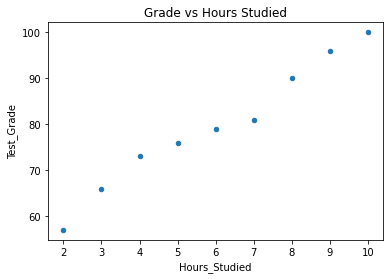

In [4]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that <b>the grade gradually increases with the increase in hours of study</b>. 

This implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [5]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

,PythonMark,ReviewPhaseMark
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10


In [6]:
df.corr()

,PythonMark,ReviewPhaseMark
PythonMark,1.000000,0.904868
ReviewPhaseMark,0.904868,1.000000


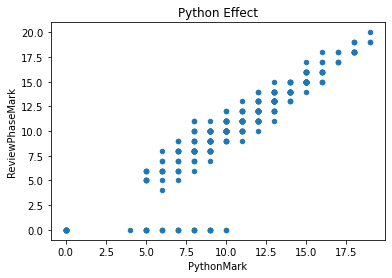

In [7]:
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

In [8]:
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable


In [9]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)


alpha =  1.1096258969443358
beta =  -1.4936733199830208


In [11]:
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


R-squared: 0.79
mean absolute error: 1.21
Mean squared error: 4.22


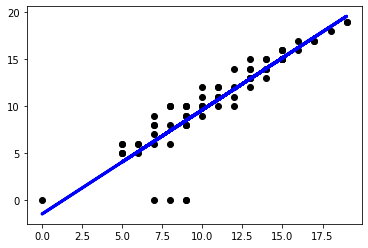

In [12]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


### 2.3.  Multivariate Linear regression ($m>1$)

Let us consider the following data

In [13]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
print(maths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

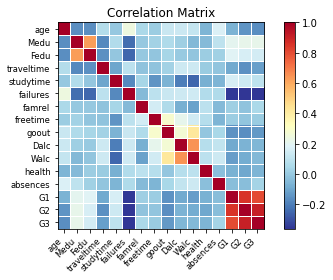

In [15]:
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [16]:
maths.sex.unique()#this is a categorical variable

array(['F', 'M'], dtype=object)

In [17]:
maths.famsize.unique()#this is a categorical variable

array(['GT3', 'LE3'], dtype=object)

<b>Note that sklearn can only accept numerical inputs</b>.

### 2.3.1. Pre-processing of labeled data
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.

- <b>LabelBinarizer</b>: This will replace the binary variable text withvnumeric vales. We'll be using this function for the binary categorical variables.

- <b>LabelEncoder</b>: This will replace category level with number representation.

- <b>OneHotEncoder</b>: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling <b>OneHotEncoder</b>, we should use <b>LabelEncoder</b> to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [18]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

array([0, 1])

In [19]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

array([0, 1])

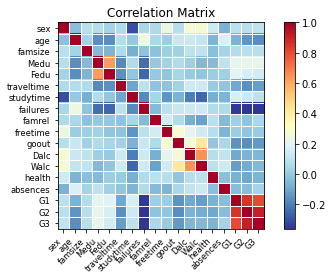

In [20]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



In [21]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

In [22]:
# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

LinearRegression()

In [23]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

The R-Squared:  0.7983552161587196
sex :  0.16476928111566563
famsize :  -0.020837379216875864
studytime :  -0.043940699688089634
famrel :  0.3631349649085571
absences :  0.04105103296124567
G1 :  0.15698723303548884
G2 :  0.9987849801717963
The intercept of our slope is:  -3.683923561369623


In [24]:
MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

Mean Absolute Error: 1.3100825502382831
Mean Squared Error: 4.134735824024409
Root Mean Squared Error: 2.0334049827873466


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [5]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

,Test,Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
21,Iris-versicolor,Iris-versicolor,0.01,0.71,0.28
14,Iris-versicolor,Iris-versicolor,0.00,0.71,0.29
12,Iris-versicolor,Iris-versicolor,0.00,0.79,0.20
4,Iris-setosa,Iris-setosa,0.97,0.03,0.00
35,Iris-versicolor,Iris-versicolor,0.05,0.88,0.07
11,Iris-versicolor,Iris-versicolor,0.01,0.81,0.18
20,Iris-virginica,Iris-virginica,0.00,0.19,0.81
24,Iris-virginica,Iris-virginica,0.00,0.43,0.57
36,Iris-setosa,Iris-setosa,0.94,0.06,0.00
23,Iris-setosa,Iris-setosa,0.98,0.02,0.00


In [6]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


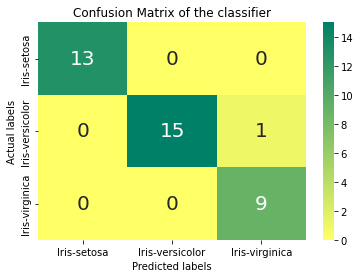

In [7]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [8]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [2]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [20]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


In [3]:
f=lambda x:(x**3+5*x-20)/(x**2+3)
print("A =",quad(f,0,2)[0])

g=lambda x:(x-1/3)*(x**4-3)**0.5
print("B =",quad(g,3,5)[0])

A = -7.049316535735796
B = 124.40877284192784


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [4]:
def model(w,t):
    x1,x2,x3=w
    dx1dt=-1/2*x1
    dx2dt=1/2*x1-1/4*x2
    dx3dt=1/4*x2-1/6*x3
    return np.array([dx1dt,dx2dt,dx3dt])
w0=[1,1,1]
a=0
b=4
N=200

t=np.linspace(a,b,N)
w=odeint(model,w0,t)
x1=w[:,0]
x2=w[:,1]
x3=w[:,2]


2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


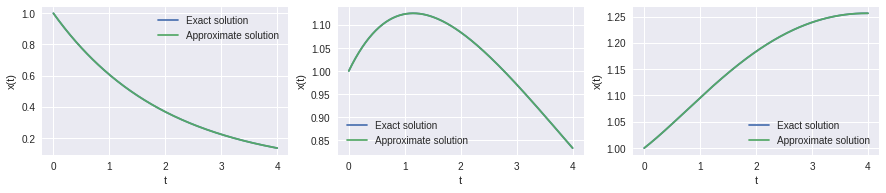

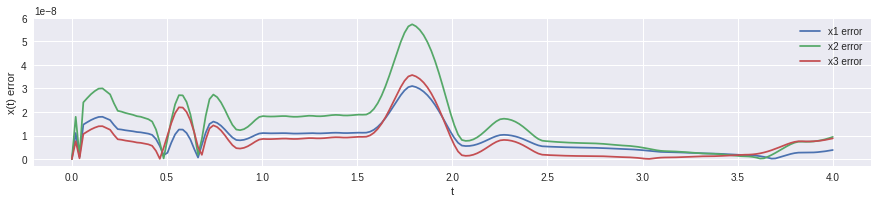

In [5]:
x1_ex=np.exp(-t/2)
x2_ex=-2*np.exp(-t/2)+3*np.exp(-t/4)
x3_ex=3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6)
er_1=np.absolute(x1-x1_ex)
er_2=np.absolute(x2-x2_ex)
er_3=np.absolute(x3-x3_ex)

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.plot(t,x1_ex)
plt.plot(t,x1)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["Exact solution","Approximate solution"])



# plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
plt.plot(t,x2_ex)
plt.plot(t,x2)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["Exact solution","Approximate solution"])

# plt.figure(figsize=(15,6))
plt.subplot(2,3,3)
plt.plot(t,x3_ex)
plt.plot(t,x3)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["Exact solution","Approximate solution"])

# fig = plt.figure()
plt.figure(figsize=(15,6))
plt.subplot(2,3,(4,6))
plt.plot(t,er_1)
plt.plot(t,er_2)
plt.plot(t,er_3)
plt.xlabel("t")
plt.ylabel("x(t) error")
plt.legend(["x1 error","x2 error","x3 error"])
plt.show()
# fig.savefig('image.png')


$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [6]:
def EulerOdeSys(f,c,t):
    N=len(t)
    H=t[1]-t[0]
    M=len(f)
    Z=np.zeros((N,M))
    Z[0,:]=c
    
    for j in range(M):
        g=f[j]
        for i in range(N-1):
            Z[i+1,j]= Z[i,j]+H*g(Z[i,j],t[i])       
    return Z


2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [8]:
def RK4OdeSys(f,c,t):
    N=len(t)
    H=t[1]-t[0]
    M=len(f)
    Z=np.zeros((N,M))
    Z[0,:]=c
    for j in range(M):
        g=f[j]
        for i in range(N-1):
            k1=g(Z[i,j],t[i])
            k2=g(Z[i,j]+H*k1/2,t[i]+H/2)
            k3=g(Z[i,j]+H*k2/2,t[i]+H/2)
            k4=g(Z[i,j]+H*k3,t[i]+H)
            Z[i+1,j]= Z[i,j]+H/6*(k1+2*k2+2*k3+k4) 
    return Z

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [9]:
x_1=lambda x,y:np.exp(-1/2*x)
x_2=lambda x,y:1/2*x-1/4*x
x_3=lambda x,y:1/4*x-1/6*x

f=[x_1,x_2,x_3]
c=1       
Z_Euler=EulerOdeSys(f,c,t)
Z_RK=RK4OdeSys(f,c,t)

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

[0.00000000e+00 8.53095372e-13 1.68909331e-12 2.50821586e-12
 3.31090710e-12 4.09716705e-12 4.86743978e-12 5.62183633e-12
 6.36080077e-12 7.08433312e-12 7.79276643e-12 8.48632276e-12
 9.16522414e-12 9.82980364e-12 1.04800613e-11 1.11163301e-11
 1.17389432e-11 1.23477895e-11 1.29434241e-11 1.35258471e-11
 1.40953915e-11 1.46520573e-11 1.51963997e-11 1.57283075e-11
 1.62480029e-11 1.67558190e-11 1.72517556e-11 1.77361459e-11
 1.82091009e-11 1.86707316e-11 1.91214822e-11 1.95612415e-11
 1.99903427e-11 2.04088968e-11 2.08170148e-11 2.12150297e-11
 2.16030527e-11 2.19810836e-11 2.23493446e-11 2.27081687e-11
 2.30575559e-11 2.33976172e-11 2.37285747e-11 2.40505393e-11
 2.43638443e-11 2.46683785e-11 2.49643639e-11 2.52520227e-11
 2.55314658e-11 2.58026933e-11 2.60660382e-11 2.63213895e-11
 2.65691913e-11 2.68093325e-11 2.70420353e-11 2.72674106e-11
 2.74854584e-11 2.76965118e-11 2.79005707e-11 2.80978574e-11
 2.82883716e-11 2.84722246e-11 2.86496382e-11 2.88205015e-11
 2.89852586e-11 2.914379

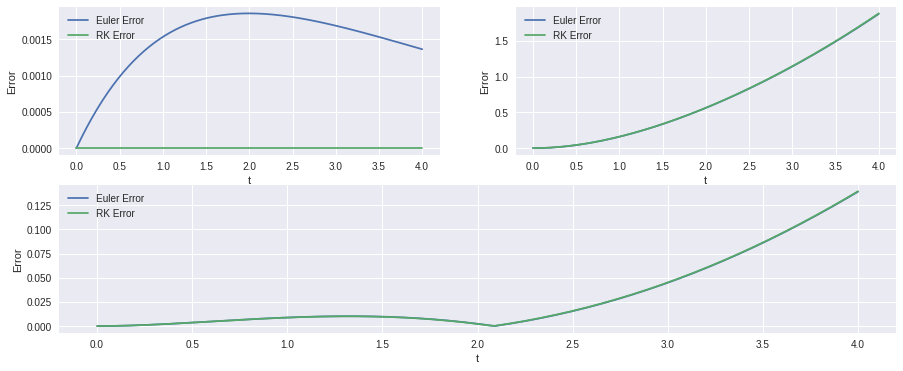

In [11]:
er_1_E=np.absolute(Z_Euler[:,0]-x1_ex)
er_2_E=np.absolute(Z_Euler[:,1]-x2_ex)
er_3_E=np.absolute(Z_Euler[:,2]-x3_ex)


er_1_RK=np.absolute(Z_RK[:,0]-x1_ex)
er_2_RK=np.absolute(Z_RK[:,1]-x2_ex)
er_3_RK=np.absolute(Z_RK[:,2]-x3_ex)


plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(t,er_1_E)
plt.plot(t,er_1_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["Euler Error","RK Error"])


plt.subplot(2,2,2)
plt.plot(t,er_2_E)
plt.plot(t,er_2_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["Euler Error","RK Error"])



plt.subplot(2,2,(3,4))
plt.plot(t,er_3_E)
plt.plot(t,er_3_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["Euler Error","RK Error"])
plt.show()

From the plot above we can only conclude that the more accurate function is either <b>odeint</b> and <b>RK4</b> since they give a solution with the lowest error. To identify the more accurate solver, let us plot the absolute error between the exact and approximate solutions (obtained with <b>odeint</b> and <b>RK4</b>), tell us which function gives a more accurate solution of a system of ODEs.

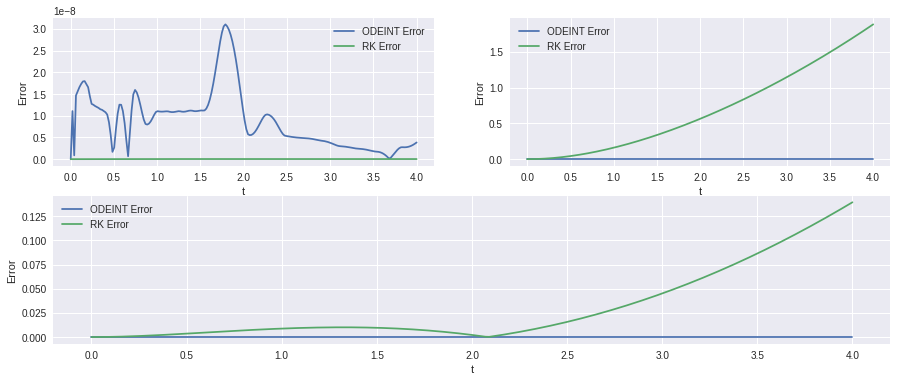

In [61]:
er_1=np.absolute(x1-x1_ex)
er_2=np.absolute(x2-x2_ex)
er_3=np.absolute(x3-x3_ex)

er_1_RK=np.absolute(Z_RK[:,0]-x1_ex)
er_2_RK=np.absolute(Z_RK[:,1]-x2_ex)
er_3_RK=np.absolute(Z_RK[:,2]-x3_ex)

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(t,er_1)
plt.plot(t,er_1_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["ODEINT Error","RK Error"])



plt.subplot(2,2,2)
plt.plot(t,er_2)
plt.plot(t,er_2_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["ODEINT Error","RK Error"])



plt.subplot(2,2,(3,4))
plt.plot(t,er_3)
plt.plot(t,er_3_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["ODEINT Error","RK Error"])
plt.show()

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [74]:
def MatGenerator(𝑎,𝑏,𝐾,alp,bta,𝑁,𝑔):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    A=np.zeros((N+1,N+1))
    A[0,0],A[N,N]=1,1
    A[1,0],A[N-1,N]=-1,-1
    A[1:N,1:N]=2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)-np.eye(N-1,N-1,k=-1)
    b=np.zeros(N+1)
    b[0]=alp
    b[N]=bta
    b[1:N]=h**2/K*g(x[1:N])
    return A,b
    
    
    
    
    

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

In [81]:
𝑎=0
𝑏=1
𝐾=1
alp=-4
bta=0
𝑁=100
𝑔=lambda x:-4*(1+𝑥)*np.exp(x)
M=MatGenerator(𝑎,𝑏,𝐾,alp,bta,𝑁,𝑔)

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

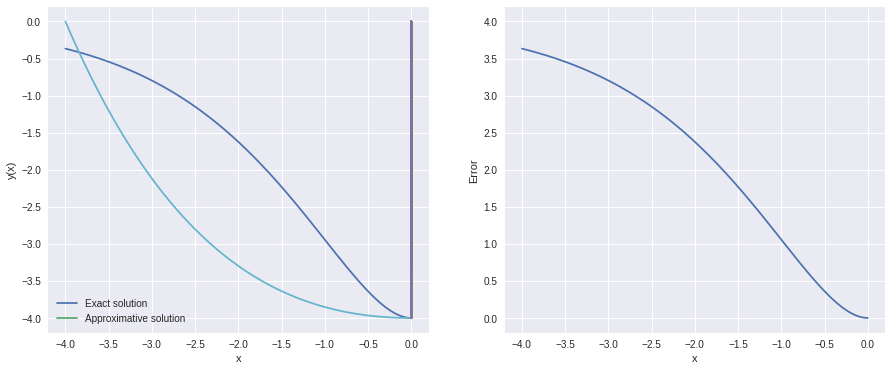

In [85]:
𝑈=lambda x:4*(𝑥-1)*np.exp(x)
x=np.linspace(a,b,N+1)
U_ex=U(x)

A=M[0]
b=M[1]
Approx=np.linalg.solve(A,b)

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(x,U_ex)
plt.plot(x,Approx)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(["Exact solution","Approximative solution"])



plt.subplot(1,2,2)
plt.plot(x,abs(Approx-U_ex))
plt.xlabel("x")
plt.ylabel("Error")
plt.show()



4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

b. Solve the steady-state heat-conduction problem for 

$$a=-1, b= 1, K(x)=x^2,\alpha = -8, \beta = 0, N= 100 \text{ and } g(x) = -4(x^3+3x^2)e^{x+1} $$

c. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^{x+1}$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [194]:
def Fibonacci(n):
    if n in [1,2]:
        return n
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)

def SumEven():
    s=2
    n=5
    while Fibonacci(n) <= 4000000:
        s+=Fibonacci(n)
        n+=3
    return s
print(f"The sum is {SumEven()}")

The sum is 4613732


2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [230]:
d= ("").join([str(i) for i in range(185186)])
v= int(d[1])*int(d[10])*int(d[100])*int(d[1000])*int(d[10000])*int(d[100000])*int(d[1000000])
print(f"The value is {v}.")

The value is 210.


3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [198]:
def Leap_Year(y):
    # Returns if a year is a leap year or not
    return (y % 4 == 0 and y % 100 != 0 ) or (y % 400 == 0)

def Jan1(y):
    # Returns the day of January 1st for the year y as an integer in {0,1...6}
    if y == 1900:
        return 1
    elif Leap_Year(y-1):
        return (Jan1(y-1)+2) % 7
    else:
        return (Jan1(y-1)+1) % 7
    
def Month1(m,y):
    # Returns the first day of month m in {1,2...12} for the year y 
    if m == 1:
        return Jan1(y)
    elif m in [2,4,6,8,9,11]:
        return (Month1(m-1,y) +3) % 7
    elif m!=3:
        return (Month1(m-1,y) +2) % 7
    elif Leap_Year(y):
        return (Month1(2,y)+1) % 7
    else:
        return (Month1(2,y))
    
def Sunday1():
    # Returns the answer to the question
    s=0
    for i in range(1901, 2001):
        s+= len([m for m in range(1,13) if Month1(m,i)==0])
    return s

print(f"There were {Sunday1()} months that started on a sunday during the twentieth century.")

There were 171 months that started on a sunday during the twentieth century.



**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [116]:
def Swap(s):
    return "".join([i.swapcase() for i in s if i.isalpha()])

2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [117]:
def UpLow(s):
    l= [0, 0]
    for i in s:
        if i.isupper():
            l[1]+= 1
        elif i.islower():
            l[0]+= 1
    return l

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [118]:
def IsName(s):
    return s[0].isupper() ==1 and UpLow(s)[0] == len(s)-1

4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list element contains a name**. If there are no names on the list please return ``-1``

In [119]:
def ListName(L):
    for i in range(len(L)):
        s= L[i].split(" ")
        for j in s:
            if IsName(j):
                return i
    return -1

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [120]:
import numpy as np
def MaxNeg(L):
    neg= [i for i in L if i<0]
    if len(neg) == 0:
        return 0
    else:
        return max(neg)

2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [121]:
def RowMaxNeg(M):
    s=0
    for i in M:
        s+= MaxNeg(i)
    return s

3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [122]:
def ColMaxNeg(M):
    return RowMaxNeg(M.T)

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [123]:
from scipy.integrate import quad
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)
A= quad(f, 0, 2)[0]
B= quad(g, 3, 5)[0]
print(f"A= {A}. \nB={B}")

A= -7.049316535735796. 
B=124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [124]:
def Trap(f,a,b,H=0.001):
    Z= 0
    N= int(1+(b-a)/H)
    d= np.linspace(a,b,N)
    for i in range(1,N):
        Z+= H*(f(d[i-1])+f(d[i]))/2
    return Z

3- Compute the integrales A and B using your function **Trap**

In [125]:
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)
A= Trap(f, 0, 2)
B= Trap(g, 3, 5)
print(f"A= {A}. \nB={B}")

A= -7.049316458638298. 
B=124.40877672379841


**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [170]:
from scipy.optimize import fsolve
def System(z):
    x, y= z
    F= np.empty((2))
    F[0]= x**2+ y+ x- 4
    F[1]= 2* np.exp(x)+ 3* y
    return F

zGuess= np.empty((2))
z= fsolve(System,zGuess)
print(f"x={z[0]}, y={z[1]}")

x=2.0239643168658783, y=-4.752707030344894


2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [171]:
A= np.array([[1, -2, -1, 6], [2, 2, -1, -7], [-1, -1, 2, 5], [-3, 4, 2, 5]])
b= np.array([[4], [-4], [5], [8]])
z = np.linalg.solve(A,b)
print(z)

[[1.]
 [1.]
 [1.]
 [1.]]


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [172]:
def EulerMethod(f, a, b, c, N):
    H= (b-a)/(N)
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= y[i-1]+H*f(x[i-1],y[i-1])
    return np.array([x,y])

2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [173]:
def RK2Method(f, a, b, c, N):
    H= (b-a)/(N)
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= y[i-1] + H * f(x[i-1]+H/2, y[i-1]+f(x[i-1],y[i-1])*H/2)
    return np.array([x,y])

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

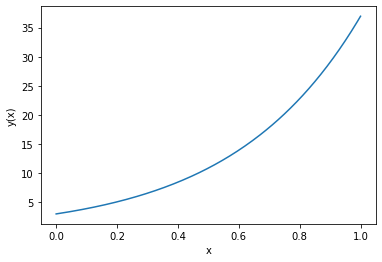

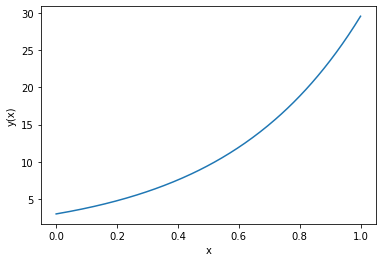

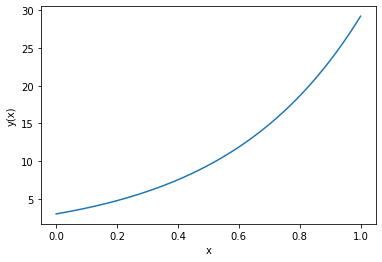

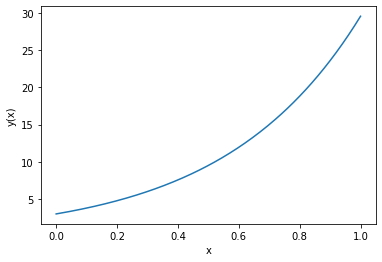

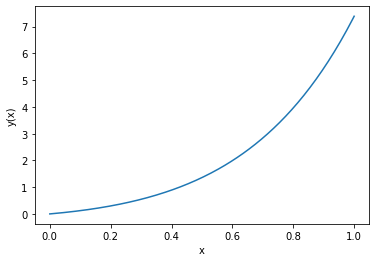

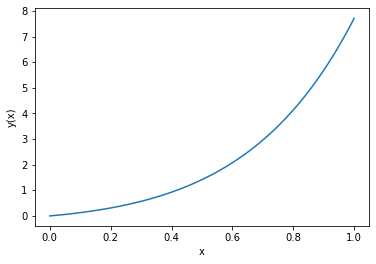

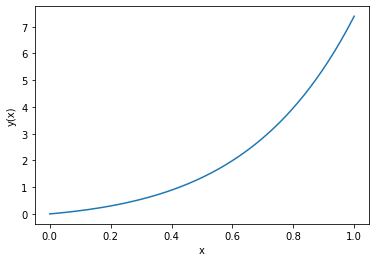

In [226]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def Realsol(a, b, c, N):
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= 3*np.exp(2*x[i])+2*x[i]*np.exp(2*x[i])
    return np.array([x,y])

def model(y,x):
    dydx = 2*y + np.exp(2*x)
    return dydx

f= lambda x,y: model(y,x)

c = 3
a = 0
b = 1
N = 200
x = np.linspace(a, b, N+1)

O= odeint(model, c, x).flatten()
E= EulerMethod(f, a, b, c, N)
R= RK2Method(f, a, b, c, N)
S= Realsol(a, b, c, N)


plt.plot(S[0],S[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(x,O)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(E[0],E[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(R[0],R[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

plt.plot(x,abs(O-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(E[0],abs(E[1]-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(R[0],abs(R[1]-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

4. Which of the numerical methods used is more efficient? Why?

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [234]:
def MatGenerator(a,b,l,alpha,bet,N,g):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=g(x[0])+alpha*(l**2/h**2)
    B[N]=g(x[N])+bet*(l**2/h**2)
    for i in range(1,N):
        B[i]=g(x[i-1])
    A=(l**2/h**2)*(-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1))
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

ValueError: x and y must have same first dimension, but have shapes (201,) and (101,)

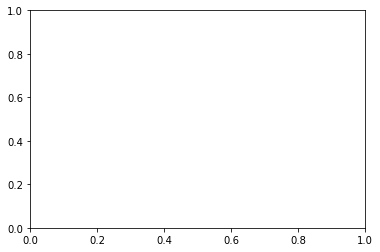

In [233]:
g= lambda x:-4*(1+x)*np.exp(x)
x
A,B= MatGenerator(0,1,1,-4,0,100,g)
U= np.linalg.solve(A,B)
plt.plot(x,U)

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [200]:
import Group10 as gp
print(f"The 5th fibonacci number is {gp.Fibonacci(5)}")

The 5th fibonacci number is 8


In [201]:
print(f"The sum of even fibonacci numbers before 4 millions is {gp.SumEven()}")

The sum of even fibonacci numbers before 4 millions is 4613732


In [202]:
print(f"Is 2022 a leap year? {gp.Leap_Year(2022)}")

Is 2022 a leap year? False


In [205]:
print(f"January 1st 2022 was the {gp.Jan1(2022)}th day of the week")

January 1st 2022 was the 6th day of the week


In [206]:
print(f"October 1st 2022 was the {gp.Month1(10,2022)}th day of the week")

October 1st 2022 was the 6th day of the week


In [207]:
print(f"There were {gp.Sunday1()} months that started on a sunday during the twentieth century.")

There were 171 months that started on a sunday during the twentieth century.


In [210]:
print(f"After swapping and removing non letters, 'The_Kid.64' becomes '{gp.Swap('The_Kid.64')}'.")

After swapping and removing non letters, 'The_Kid.64' becomes 'tHEkID'.


In [211]:
print(f"The string 'The Kid is sick.' has {gp.UpLow('The Kid is sick.')[0]} lower case letters and {gp.UpLow('The Kid is sick.')[1]} upper case letters.")

The string 'The Kid is sick.' has 10 lower case letters and 2 upper case letters.


In [212]:
print(f"Is 'Thekid' a name? {gp.IsName('Thekid')}")

Is 'Thekid' a name? True


In [214]:
print(f"The first name in ['ThekiD','thekid','is Thekid good'] is at index {gp.ListName(['ThekiD','thekid','is Thekid good'])}")

The first name in ['ThekiD','thekid','is Thekid good'] is at index 2


In [216]:
print(f"The maximum negative number in [-1,2,-4] is {gp.MaxNeg([-1,2,-4])}")

The maximum negative number in [-1,2,-4] is -1


In [218]:
M= np.array([[-1,2],[1,2],[-2,-4]])
print(f"The sum of maximums per rows is {gp.RowMaxNeg(M)}")

The sum of maximums per rows is -3


In [219]:
M= np.array([[-1,2],[1,2],[-2,-4]])
print(f"The sum of maximums per columns is {gp.ColMaxNeg(M)}")

The sum of maximums per columns is -5


In [220]:
f= lambda x: (x**3+5*x-20)/(x**2+3)
A= gp.Trap(f, 0, 2)
print(f"A= {A}.")

A= -7.049316458638298.


In [221]:
zGuess= np.empty((2))
z= fsolve(gp.System,zGuess)
print(f"x={z[0]}, y={z[1]}")

x=2.0246922775889384, y=-4.756716147795825


C:\Users\ASUS\OneDrive\Documents\Prog\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [227]:
f= lambda x,y: gp.model(y,x)

E= gp.EulerMethod(f, 0, 1, 3,200)
E

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [228]:
R= gp.RK2Method(f, 0, 1, 3, 200)
R

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [229]:
S= gp.Realsol(0, 1, 3, 200)
S

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

**Exercise 1**

1- Write a program that asks the user to enter a word and determines whether the word is a
palindrome or not. A palindrome is a word that reads the same backwards as forwards.

In [43]:
word= input("Enter a word: ")
if word.upper() == word.upper()[::-1]:
    print(f"{word} is a palindrome.")
else:
    print(f"{word} is not a palindrome.")

Enter a word: Pop
Pop is a palindrome.


2- A simple way to estimate the number of words in a string is to count the number of spaces
in the string. Write a program that asks the user for a string and returns an estimate of how
many words are in the string.

In [44]:
def Words():
    s= input("Enter a string: ")
    return len(s.split(" "))-s.split(" ").count("")

3-Write a program that asks the user for a large integer and inserts commas into it according
to the standard American convention for commas in large numbers. For instance, if the user
enters 1000000, the output should be 1,000,000.

In [48]:
e= input("Enter a large integer: ")
if len(e)<4:
    print(e)
else:
    b= [ e[len(e)-3*i-3:len(e)-3*i] for i in range(len(e)//3) ]
    if len(e)%3 != 0:
        a= [e[:len(e)%3]]
        b.append(a[0])
    b= b[::-1]
    print(",".join(b))

Enter a large integer: 1000000
1,000,000


**Exercise 2**

The goal of this exercise is to see if you can mimic the behavior of the **in** operator and the
**count** and **index** methods using only variables, for loops, and if statements.

1- Without using the **in** operator, write a program that asks the user for a string and a letter
and prints out whether or not the letter appears in the string.


In [49]:
word= input("Enter a string: ")
l= input("Enter a letter: ")
d= "not present"
for i in word:
    if i == l:
        d= "present"
        break
print(f"{l} is {d} in {word}.")

Enter a string: hfjgf
Enter a letter: f
f is present in hfjgf.


2- Without using the **count** method, write a program that asks the user for a string and a
letter and counts how many occurrences there are of the letter in the string.


In [85]:
word= input("Enter a string: ")
l= input("Enter a letter: ")
d=0
for i in word:
    if i == l:
        d+=1
print(f"{l} appears {d} times in {word}.")

Enter a string: sgrgergfgs
Enter a letter: g
g appears 4 times in sgrgergfgs.


3- Without using the **index** method, write a program that asks the user for a string and
a letter and prints out the index of the first occurrence of the letter in the string. If the
letter is not in the string, the program should say so.

In [89]:
word= input("Enter a string: ")
l= input("Enter a letter: ")
d= -1
for i in range(len(word)):
    if word[i] == l:
        d= i
if d==-1:
    print(f"{l} is not in {word}")
else:
    print(f"The first index of {l} in {word} is at index {d}")

Enter a string: get
Enter a letter: t
The first index of t in get is at index 2


**Exercise 3**

Write a function that takes any two lists L and M of the same size and adds their elements together to form a new list N whose elements are sums of the corresponding elements in L and M. For instance, if L=[3,1,4] and M=[1,5,9], then N should equal [4,6,13].

In [50]:
def Add(L,M):
    return [L[i]+M[i] for i in range(len(L))]

**Exercise 4**

Write a program that removes any repeated items from a list so that each item appears at most
once. For instance, the list [1,1,2,3,4,3,0,0] would become [1,2,3,4,0].

In [51]:
def Rem(L):
    return [i for i in set(L)]

**Exercise 5**

Let L=[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]. Use a list comprehension to
produce a list of the gaps between consecutive entries in L. Then find the maximum gap size
and the percentage of gaps that have size 2.

In [111]:
L= [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]
g= [abs(L[i+1]-L[i]) for i in range(len(L)-1)]
mg= max(g)
p2= 100*g.count(2)/len(g)
print(f"The list of gaps is {g}.\nThe maximum gap is {mg}.\nThe percentage of gaps of size 2 is {p2} % ")

The list of gaps is [1, 2, 2, 4, 2, 4, 2, 4, 6, 2, 6, 4, 2, 4].
The maximum gap is 6.
The percentage of gaps of size 2 is 42.857142857142854 % 


**Exercise 6**

1- Using the list comprehensions, write a function, **ListComp** that takes a list $L$ of strings as input and returns 
- a list that consists of the strings of $L$ with their first characters removed
- a list of the lengths of the strings of $L$
- a list that consists of only those strings of $L$ that are at least 5 characters long

In [114]:
def ListComp(L):
    le=[len(i) for i in L]
    l3=[]
    ll=[i.removeprefix(i[0]) for i in L]
    for i in range(len(L)):
        if len(L[i])<6:
            l3.append(L[i])
    return ll, le, l3

2- Test your function **ListComp** by using the surname of your group members

In [128]:
ListComp(["Njabo", "Ndonfack", "Nibishaka", "Kimani","Niyokwizera"])

(['jabo', 'donfack', 'ibishaka', 'imani', 'iyokwizera'],
 [5, 8, 9, 6, 11],
 ['Njabo'])

**Exercise 7**

1- Write a program that repeatedly asks the user to enter product names and prices. Store all
of these in a dictionary whose keys are the product names and whose values are the prices.
When the user is done entering products and prices, allow them to repeatedly enter a product
name and print the corresponding price or a message if the product is not in the dictionary.

In [140]:
products={}
p=eval(input("Enter the number of products: "))
for i in range(p):
    name= input("Enter a product name: ")
    price= eval(input("Enter the price of the product: "))
    products.update({name:price})
a=eval(input("Enter the number of products you want to access: "))
for i in range(a):
    n= input("Enter a product name: ")
    if n in products:
        print(f"The price of {n} is {products[n]}.")
    else:
        print(f"{n} is not available.")

Enter the number of products: 5
Enter a product name: Hat
Enter the price of the product: 10
Enter a product name: Shirt
Enter the price of the product: 15
Enter a product name: Pants
Enter the price of the product: 40
Enter a product name: Shoes
Enter the price of the product: 75
Enter a product name: Vest
Enter the price of the product: 123
Enter the number of products you want to access: 2
Enter a product name: Shoes
The price of Shoes is 75.
Enter a product name: Socks
Socks is not available.


2- Using the dictionary created above, allow the user to enter a dollar amount and print out all the products whose price is less than that amount.

In [142]:
dol = eval(input("Enter a dollar amount: "))
less={}
for i in products:
    if products[i]<dol:
        less.update({i:products[i]})
less

Enter a dollar amount: 35


{'Hat': 10, 'Shirt': 15}

**Exercise 8**

1 - Repeatedly ask the user to enter a team name and the how many games the team won and
how many they lost. Store this information in a dictionary where the keys are the team names
and the values are lists of the form [wins, losses].

In [144]:
n = int(input("Enter number of teams: "))
records = {}
for i in range(n):
    name = input("Enter the name of the team: ")
    wins = int(input("Enter the number of wins: "))
    losses = int(input("Enter the number of losses: "))
    records.update({name:[wins, losses]})

Enter number of teams: 4
Enter the name of the team: Warriors
Enter the number of wins: 53
Enter the number of losses: 29
Enter the name of the team: Mavericks
Enter the number of wins: 52
Enter the number of losses: 30
Enter the name of the team: Pistons
Enter the number of wins: 23
Enter the number of losses: 59
Enter the name of the team: Magic
Enter the number of wins: 22
Enter the number of losses: 60


2- Using the dictionary created above, allow the user to enter a team name and print out the team’s winning percentage.

In [145]:
t = input("Enter team name :")
print(f"The winning percentage of {t} is {100*records[t][0]/sum(records[t])} %")

Enter team name :Magic
The winning percentage of Magic is 26.829268292682926 %


3- Using the dictionary, create a list whose entries are the number of wins of each team.

In [147]:
w_team = [i[0] for i in records.values()]
print(w_team)

[53, 52, 23, 22]


4- Using the dictionary, create a list of all those teams that have winning records.

In [148]:
w_rec = []
for i in records:
    if records[i][0] > records[i][1] :
        w_rec.append(i)
print(w_rec)

['Warriors', 'Mavericks']


**Exercise 9**

Write a function called matches that takes two strings as arguments and returns how many
matches there are between the strings. A match is where the two strings have the same character at the same index. For instance, 'python' and 'path' match in the first, third, and
fourth characters, so the function should return 3.

In [ ]:
def matches(n,m):
    r=0
    for i in range(min(len(n),len(m))):
        if n[i] == m[i]:
            r+=1
    return r

**Exercise 10**

Recall that if s is a string, then s.find('a') will find the location of the first a in s. The
problem is that it does not find the location of every a. Write a function called findall that
given a string and a single character, returns a list containing all of the locations of that character in the string. It should return an empty list if there are no occurrences of the character
in the string.

In [150]:
def findall(word, char):
    pos=[]
    for i in range(len(word)):
        if word[i] == char:
            pos.append(i)
    return pos

[1, 8, 13, 14, 16, 19]

**Exercise 11**

Write a function that takes two already sorted lists (ascending order) of possibly different lengths,
and merges them into a single sorted list.

1- Do this using the sort method. Function name is **merge1**

In [161]:
def merge1(l1, l2):
    r=l1+l2
    r.sort()
    return r

[1, 2, 3, 4, 5, 6, 7]

2- Do this without using the sort method. Function name is **merge2**

In [167]:
def merge2(l1, l2):
    r=l1+l2
    d=[]
    for i in range(len(r)):
        d.append(min(r))
        r.remove(d[i])
    return d

3- Test the two function using the list

L1 = [15, 20, 40, 58, 62, 64];
L2 = [58, 60, 62, 64, 70]

In [168]:
print(merge1([15, 20, 40, 58, 62, 64], [58, 60, 62, 64, 70]))
print(merge2([15, 20, 40, 58, 62, 64], [58, 60, 62, 64, 70]))

[15, 20, 40, 58, 58, 60, 62, 62, 64, 64, 70]
[15, 20, 40, 58, 58, 60, 62, 62, 64, 64, 70]


**Exercise 12**

1- Let us consider a continuous function “f” which is defined on the closed interval [a, b], is given with f(a) and f(b) of different signs. Then by intermediate theorem, there exists a point x belong to (a, b) for which f(x) = 0. The bisection method is an approximation method to find the roots of the given equation by repeatedly dividing the interval. This method will divide the interval until the resulting interval is found, which is extremely small.

Let $x_0 \in [a,b]$ be the solution of the equation $f(x) = 0$. Write a function named **Bissection** that
- returns $\bar{x}$ and $f(\bar{x})$  such that $ \mid \bar{x} - x_0 \mid \leq \epsilon, $ if $f(a)\times f(b)\leq 0$
- prints "Bissection method failed", otherwise.

for the given inputs $f,a,b$ and $\epsilon$ with a default value $10^{-2}$.

In [57]:
def Bissection(f,a,b,epsilon=0.01):
    if f(a)*f(b) > 0:
        print("Bissection failed")
        return ""
    else:
        xbar=(b+a)/2
        if f(xbar) == 0 or b-a <= 2*epsilon:
            return xbar, f(xbar)
        elif f(xbar) * f(a) <0:
            return Bissection(f,a,xbar,epsilon)
        else:
            return Bissection(f,xbar,b,epsilon)

2- Test your function **Bissection** for $ f(x) = x^3 -3x - 5$, $a=-10$ and $b=10$

In [59]:
f= lambda x : x**3-3*x-5
print(Bissection(f,-10,10))

(2.275390625, -0.04555877298116684)


**Exercise 13**

1- Write a function called <b>number_of_factors</b> that takes a positive integer and returns how many factors the number has; and a list of its factors.

In [26]:
def number_of_factors(n):
    x=[1]
    if n==1:
        return len(x),x
    else:
        for i in range(2,n//2+1):
            if n%i==0:
                x.append(i)
        x.append(n)
        return len(x),x

2- Write a Python function called <b>IsPrime</b> that takes a positive integer, $n$, as input and returns the boolean True if $n$ is a prime number and False, otherwise. 

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.



In [27]:
def IsPrime(n):
    return number_of_factors(n)[0] == 2

False

3- Write a function called **primes** that is given a positive integer $n$ and returns a list of the first $n$
primes. Let the default value of n be 100.


In [28]:
def Firstprimes(n=2):
    if n==2:
        return 2
    elif n%2==0:
        p=n+1
    else:
        p=n
    while not IsPrime(p):
        p+=2
    return p

def primes(n=100):
    x=[2]
    i=3
    while len(x)<n:
        if IsPrime(i):
            x.append(i)
        i=Firstprimes(i+1)
    return x

4- Modify the function above so that there is an optional argument called start that allows
the list def Firstprimes(n=2):to start at a value other than 2. The function should return the first n primes that
are greater than or equal to start. The default value of start should be 2.

In [29]:
def primes2(start=2, n=100):
    x=[Firstprimes(start)]
    i=Firstprimes(x[0]+1)
    while len(x)<n:
        if IsPrime(i):
            x.append(i)
        i=Firstprimes(i+1)
    return x

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541]

5- Write a function **V** that takes a positive integer $n$ and a prime number $p$ and returns the greaters integer $r$ such that $p^r$ divides $n$.



In [34]:
def V(n,p):
    r=0
    i=0
    while(p**i <= n):
        if n%(p**i) == 0:
            r=i
        i+=1
    return r

6- Write the funtion **D** that takes two positive integer $n,m$ and return the sum $S_1$ given by 
 $$ S_1 = \sum_{p\; prime} \Bigl| V(n,p) - V(m,p)\Bigr| $$

Note that $D(14,24)=4$.



In [41]:
def D(n,m):
    s=0
    for i in range(2,max(n,m)+1):
        if IsPrime(i)==True:
            s+= abs(V(n,i)-V(m,i))
    return s

4

7- Write the funtion $P$ that takes a positive integer $N$ and return the sum $S_2$ given by 

$$S_2  = \sum_{n=1}^{N}\sum_{m=1}^{N}D(n,m).$$

Note that $S(10)=210$ and $S(10^2)$ = 37018.


In [42]:
def P(N):
    s=0
    for n in range(1,N+1):
        for m in range(1,N+1):
            s+=D(n,m)
    return s
P(100)

37018

**Exercise 14**

Create a Module **AllFunction.py** that contains all the functions on this notebook. Then, import the module to test the functions.

In [61]:
import Group2 as gp
print(f"There are {gp.Words()} words.")
print(f"[1,2,3,4] and [5,6,7,8] become {gp.Add([1,2,3,4],[5,6,7,8])}")
print(f"[1,1,2,3,4,3,5] become {gp.Rem([1,1,2,3,4,3,5])}")
print(f"python and path match {gp.matches('python','path')} times.")
print(gp.ListComp(["Njabo", "Ndonfack", "Nibishaka", "Kimani","Niyokwizera"]))
print(f"p appears {gp.findall('popopo', 'p')} times in popopo.")
print(gp.merge1([1,223,32], [12,122]))
print(gp.merge2([1,223,32], [12,122]))
f= lambda x : x**3-3*x-5
print(gp.Bissection(f,-10,10))
print(f"number_of_factors(12) = {gp.number_of_factors(12)}")
print(f"Is 37 prime? {IsPrime(37)}")
print(f"The 100 first primes are {gp.primes()}")
print(f"The 100 first primes greater than 3 are {gp.primes2(3,100)}")
print(f"V(48,2) = {gp.V(48,2)}")
print(f"D(14,24) = {gp.D(14,24)}")
print(f"P(10) = {gp.P(10)}")

Enter a string: gegg   ethrth tehryh   ehth
4


**Exercise 1**(<font color = red> 6pts  </font>)

1- A store charges RWF 12 per item if you buy less than 10 items. If you buy between 10 and 99 items, the cost is RWF 10 per item. If you buy 100 or more items, the cost is RWF 7 per item. Write the ADL of the function, named <b>Cost</b>, that takes how many items ,$n$, they are buying and returns the total cost. (<font color = red> 3pts  </font>)

2- Translate the ADL into a python code.(<font color = red> 2pts  </font>)

In [1]:
def Cost(n):
    if n<10:
        price=12*n
    elif n<100:
        price=10*n
    else:
        price=7*n
    return price

3- Test the function <b>Cost</b> for $n = 50 \text{ and } 255$. (<font color = red> 1pt  </font>)

In [2]:
print("50 items cost RWF",Cost(50))
print("255 items cost RWF",Cost(255))

50 items cost RWF 500
255 items cost RWF 1785


**Exercise 2**(<font color = red> 10pts  </font>)

1- Write the ADL of the function, named <b>QuadEqu</b>, that takes as inputs three numbers
$a$, $b$, $c$ ∈ $\mathbb{R}$ and return the solution in R of the equation
$ax^2 + bx + c = 0$. (<font color = red> 3pts  </font>)

2- Translate the ADL into a python code such that $a=1$ by default. (<font color = red> 4pts  </font>)

In [3]:
def QuadEqu(c,b,a = 1,):
    if a==0:
        if b==0:
            if c==0:
                sol="R"
            else:
                sol="{}"
        else:
            sol="{"+str(-c/b)+"}"
    else:
        delta=b**2-4*a*c
        if delta<0:
            sol="{}"
        elif delta == 0:
            sol="{"+str(-b/(2*a))+"}"
        else:
            sol="{"+str((-b+delta**(1/2))/(2*a))+";"+str((-b-delta**(1/2))/(2*a))+"}"
    return sol

3- Test the function  <b>QuadEqu</b> for 
- $a=1, b=2, c=1$,
- $a=2, b=2, c=40$,
- $a=2, b=3, c=-5$. 

(<font color = red> 3pts  </font>)

In [4]:
print(QuadEqu(1,2))
print(QuadEqu(40,2,2))
print(QuadEqu(-5,3,2))

{-1.0}
{}
{1.0;-2.5}


**Exercise 3** (<font color = red> 9pts  </font>)

1- A year is a leap year if it is divisible by 4, except that years divisible
by 100 are not leap years unless they are also divisible by 400.
Write the ADL of the function, named <b>LeapYear</b>, that takes a year, $y$, and return the boolean <b>True</b>
if $y$ is a leap year; <b>False</b> otherwise.(<font color = red> 3pts  </font>)

2- Translate the ADL into a python code. (<font color = red> 2pts  </font>)

In [5]:
def LeapYear(y):
    d= (y%4==0 and y%100!=0)or(y%400==0)
    return d

3- Test the python code for the years 1700, 1900, 1996 and 2000. (<font color = red> 1pts  </font>)

In [6]:
print(LeapYear(1700))
print(LeapYear(1900))
print(LeapYear(1996))
print(LeapYear(2000))

False
False
True
True


4- Write the python code that asks the user to enter a year,$z$ , and displays how many leap years are between 1996 and that year. Test your code for $z=2023$ (<font color = red> 3pts  </font>)

In [7]:
z= eval(input("Enter a year: "))
if z>1996:
    print((z-1996)//4-(z-1996)//100+(z-1996)//400+1)
else:
    print((1996-z)//4-(1996-z)//100+(1996-z)//400+1)

Enter a year: 2023
7


**Exercise 4** (<font color = red> 4pts  </font>)

The digital root of a positive number n is obtained as follows: Add up the digits n to get a new number.
Add up the digits of that to get another new number. Keep doing this until you get a number
that has only one digit. That number is the digital root.

For example, if $n = 45893$, we add up the digits to get $$4 + 5 + 8 + 9 + 3 = 29.$$ We then add up
the digits of $29$ to get $$2 + 9 = 11.$$ We then add up the digits of $11$ to get $$1 + 1 = 2.$$ Since 2 has
only one digit, 2 is our digital root.

1- Write the Python code of the function **DigRoot** that returns the digital root of an integer $n$ given as input (you can use the python function **len**).(<font color = red> 3pts  </font>)



In [8]:
def DigRoot(n):
    s=0
    while n>0:
        s=s+n%10
        n=n//10
    if s<10:
        return s
    else:
        return DigRoot(s)

2-  Test the function **DigRoot** for $n = 74568$.(<font color = red> 1pts  </font>)

In [9]:
print("The digital root of 74568 is",DigRoot(74568))

The digital root of 74568 is 3


**Exercise 5**(<font color = red> 6pts  </font>)

1- Write a Python code that asks the user to enter a string and displays the number of upper case letters and lower case letters. Check for: **The quick Brow Fox and 'I am proud of Mr McDonald**. (<font color = red> 3pts  </font>)

In [10]:
s= input("Enter a string: ")
up=0
lo=0
for i in range(len(s)):
    if (s[i].isupper()):
        up=up+1
    elif (s[i].islower()):
        lo=lo+1
print("There are",up,"upper case letters and",lo,"lower case letters.")

Enter a string: The quick Brow Fox and 'I am proud of Mr McDonald.
There are 7 upper case letters and 31 lower case letters.


2- Write a Python code that asks the user to input two strings and returns the first location in which the strings differ. If the strings are identical, it should return -1. (<font color = red> 3pts  </font>)

In [11]:
def Loc():
    s1=input("Enter a string: ")
    s2=input("Enter a second string: ")
    if s1 == s2:
        return -1
    else:
        i=0
        while i<len(s1) and i<len(s2):
            if s1[i] != s2[i]:
                return i+1
            i=i+1
        return i+1
Loc()

Enter a string: t6yury
Enter a second string: 65urgjhg


1

**Exercise 6**(<font color = red> 6pts  </font>)

1- Write a Python code of function, named **AllDivisor** , that takes a positive integer $n$ as input and returns the list of all the divisors of $n$. (<font color = red> 3pts  </font>)

In [12]:
def AllDivisor(n):
    if n==1:
        return [1]
    else:
        d= [1,n]
        i=2
        while i<=n/2:
            if n%i ==0:
                d.append(i)
            i=i+1
        return d
AllDivisor(12)

[1, 12, 2, 3, 4, 6]

2- Write a Python code, based on the function **AllDivisor**, that asks the user to enter a positive integer $n$
and tells if n is a prime number or not. Test the code for $n=97$. (<font color = red> 3pts  </font>)

In [13]:
n = eval(input("Enter a positive integer: "))
if len(AllDivisor(n))==2:
    print(n,"is prime.")
else:
    print(n,"is not prime.")

Enter a positive integer: 97
97 is prime.


**Exercise 7**(<font color = red> 9pts  </font>)

1- Use the python lambda syntax to define the function $ f(x) = x^3 -3x - 5$ then compute and display $f(-10)$, $f(10)$. (<font color = red> 3pts  </font>)

In [14]:
f= lambda x : x**3-3*x-5
print("f(-10)=",f(-10))
print("f(10)=",f(10))

f(-10)= -975
f(10)= 965


2- Let us consider a continuous function “f” which is defined on the closed interval [a, b], is given with f(a) and f(b) of different signs. Then by intermediate theorem, there exists a point x belong to (a, b) for which f(x) = 0. The bisection method is an approximation method to find the roots of the given equation by repeatedly dividing the interval. This method will divide the interval until the resulting interval is found, which is extremely small.

Given the following function $ f(x) = x^3 -3x - 5;$ let $x_0 \in [a,b]$ be the solution of the equation $f(x) = 0$. Write a function named **Bissection** that returns an approximation $\bar{x}$ of $x_0$ such that $$ \mid \bar{x} - x_0 \mid \leq \epsilon, $$
for the given inputs $a,b$ and $\epsilon$ with a default value $10^{-2}$.(<font color = red> 5pts  </font>)

In [15]:
def Bissection(a,b,epsilon=0.01):
    xbar=(b+a)/2
    if f(xbar) == 0 or b-a <= 2*epsilon:
        return xbar
    elif f(xbar)<0:
        if f(a)<0:
            return Bissection(xbar,b)
        else:
            return Bissection(a,xbar)
    else:
        if f(a)>0:
            return Bissection(xbar,b)
        else:
            return Bissection(a,xbar)

3- Test the function **Bissection** for $a=-10, b=10$. (<font color = red> 1pts  </font>)

In [16]:
print(Bissection(-10,10))

2.275390625


# 1. Printing
Below is a simple example


In [23]:
print("Hi there")

Hi there


The <span style="color:red">**print**</span> function requires parenthesis around its arguments. In the program above, its only argument is the string "Hi there". Anything inside quotes will (with a few exceptions) be printed exactly as it appears.

**Exercise**: Write a python code to display your first name and your age on a single line.

**Exercise**: Write a python code to display 
- on the first line: your first name
- on the second line: your age
- on the third line: your school name

**Remark**: In the following, the first statement will output 3+4, while the second will
output 7.

In [24]:
print("3+4")
print(3+4)

3+4
7


To print several things at once, separate them by commas. Python will automatically insert spaces between them. Below is an example and the output it produces.

In [25]:
print("The value of 3+4 is", 3+4)
print("A", 1, "XYZ", 2)

The value of 3+4 is 7
A 1 XYZ 2


# 2. Commenting

Use the symbol <span style="color:red">**#**</span> to comment a text in your code. everything that follow <span style="color:red">**#**</span> on the same line will be skip

In [26]:
print("The value of 3+4 is", 3+4)#This command display the sum of 3 and 4
#print("A", 1, "XYZ", 2)

The value of 3+4 is 7


# 3. Use python as calculator
Python 3 can be used as a calculator to perform simple arithmetic operations such as addition (+), substraction (-), multiplication (\*), division (/), power (\**) and the remainder (%) and integer division (//).


In [27]:
print(7+2)       #summation
# print(18-37)   #substraction
# print(18*2)     #multiplication
# print(20/3)    #division
# print(4**2)     #powering
# print(10%3)    #remainder
# print(10//3)    #integer division

9


**Exercise**: What is the output of the each code below
- print("7+2 = ",7+2)
- print("18-37 = ",18-37)
- print("18*2 = ",18*2)
- print("20/3 = ", 20/3)
- print("4\**2 = ",4\**2)
- print("10%3 = ", 10%3)
- print("10//3 =",10//3)

## Operator precedence

When we use multiple operators in an expression program must know which operator to execute first, This is called as “operator precedence”.

**Example**: what is the output 1 + 2 * 3 - 4 / 5 \** 6

**Highest precedence rule to lowest precedence rule**
1. Parenthesis
2. Exponentiation (raise to a power)
3. Multiplication, Division, Remainder, integer division
4. Addition and Subtraction
5. left to right

**Exercise**: 
1. What is the result of the following operations in python
    - 6/(1+2)-4//2\**2
    - 3 - 47%3\**2
2. Use python to compute the result of the following operation
    - $$1+\dfrac{3^2+125}{7+\dfrac{4}{2+7}}$$

# 4. Variable and assignment

**Definition**: Variables are named memory location used to store data in program which keeps on changing during execution. Programmers can decide the names of the variables.

**Variable names**: They can take many forms, although they can only contain numbers, letters (both upper and
lower), and underscores (_). 
- They must begin with a letter or an underscore and are <b color='red' >case sensitive</b> meaning that python distinguishes between upper and lower case. E.g. Age, age and aGe are three different variables
- Additionally, some words are <b color='red'>reserved in Python</b> and so cannot be used for variable names (e.g. <b color='red'>import</b> or <b color='red'>for</b> ). 
- Double leading and trailing underscores are reserved for magic variable (e.g. init ), and so should be avoided except when specifically accessing a feature.


**Assignment**: the single equal sign (=) is used to assign a value to a variable

In [ ]:
Age = 10
print(Age)

In [ ]:
#case sensitivity
Number = 3
print(number)

In [ ]:
#case sensitivity
Age =10
age = 20
aGe = 30
print('Age =', Age)
print('age =', age)
print('aGe =', aGe)

It is advisable to also use descriptive names for variables. This way, the purpose of the variable can be understood by others.

In [29]:
#Example 1
x = "Hove"
a = 35
b = 12.50
c = a * b
print(x, 'week salary is',c)


Hove week salary is 437.5


In [30]:
#Example 2
Employee_name = "Hove"
hours_per_week = 35
rate = 12.50
pay_per_week = hours_per_week * rate
print(Employee_name, "week salary is",pay_per_week)


Hove week salary is 437.5


The reserved Python names includes: and, else, if, print, assert, except, import, raise, break exec, in, return, continue, finally, is, try, def,for, lambda, while, del, from, not, elif, global
or, class, yield, pass.

**Remark**: The reserved Python names are displayed in green.

**Exercise**: why the following are examples of bad assignment?

In [ ]:
#Not allowed
x: = 1
1X = 10
X-1 = 1
for = 20

**Exercise**: Why the code below run into an error?

In [ ]:
x=3
z=x+y

**Exercise**:After running the code below, what are the values of x, y and z?

In [ ]:
x=3
y=4
z=x+y
z=z+1
x=y
y=5

## Getting input

The input function is a simple way for your program to get information from people using your program. The basic structure is
 $$variable\text{ } name = input(message ~ ~to ~ ~user)$$

Here is an example:

In [ ]:
name = input('Enter your name: ')
print('Hello, ', name)

In [32]:
Week_salary = input("Enter your week salary: ")
month_salary = 4*Week_salary
print("Your month salary is ", month_salary)

Enter your week salary: 25
Your month salary is  25252525


The above works for getting text from the user. To get numbers from the user to use in calculations, we need to do something extra. Here is an example:

In [33]:
Week_salary = eval(input("Enter your week salary: "))
month_salary = 4*Week_salary
print("Your month salary is ", month_salary)

Enter your week salary: 25
Your month salary is  100


**Exercise**: Write a program which prompts the user for a Celsius temperature, convert the temperature to Fahrenheit, and print out the converted temperature. 

Hint: Use the following formula:
F=C*9/5+32

Here, C is the temperature in Celsius and F is the temperature in Fahrenheit.


**Exercise**: A lot of cell phones have tip calculators. Write one. Ask the user for the price of the meal and
the percent tip they want to leave. Then print both the tip amount and the total bill with the
tip included.

## 3. Some basic variable types
Python has some fundamental/built-in data types that are available with the raw installation. Examples include:

- Integers
- Floating point numbers
- Complex Numbers 
- Boolean
- Strings

The function <span style="color:green">**type**</span> is used to determine the data type of a variable.

## 3.1. Integers

Integers store numerical values without fractional parts. Integers therefore have no decimals. An integer is defined by just assigning a number to a variable without any decimals trailing. 
Example:

In [34]:
students = 20
type(students)

int

## 3.2. Floatint numbers 
A float is a floating-point number, which means it is a number that has a decimal place.
Example:

In [35]:
x = 2.0
type(x)

float

# 3.3. Boolean
The Boolean data type is used to represent true and false, using the reserved keywords <span style="color:green">**True**</span> and <span style="color:green">**False**</span>. 


The Boolean data type is also obtained from comparison or logical operation.

**a. Comparison operators**

<img src="comp_ope.png">

In [ ]:
test = (3<4)
test
#type(test)

**Exercise**: Write a Python program that asks the user to enter the value of two variables $X$ and $Y$ then prints True if $X<Y$ and False otherwise.

**b. Logical operators**: Let x and y be boolean expressions

<img src="Logi_ope.png">

In [37]:
test = not(3<4) and (5>4)
test
#type(test)

False

**Exercise**: Write a Python program that asks the user to enter the value of two variables $X$ and $Y$ then
- if $X$ is even and $Y$ is even, prints True
- otherwise prints False.

- For the code above, it is possible to use one comparison operator
- Reproduce the exercise above in case of even and odd

# 3.4. String
In python, strings are defined by placing them between matching quotes. We have different string syntaxes (simple, double or triple quotes):

In [38]:
s1 = "33354666363.6677675"
type(s1)

str

In [39]:
s2 = input('Enter a number: ')
type(s2)

Enter a number: 33


str

## a- String Indexing


In [ ]:
a = "hello World!"
print(a[3])# return the element at index 0
#print(a[1]) #return the element at index 1
#print(a[2]) # return the element at index 2

#What is the command line to extract the letter "r"?


#What is the output of a[5]?

## b- String operations

- <font color=red>' '</font> or <font color=red>" "</font> is a string (empty string)
- if s1 and s2 are strings, then s1 + s2 is a string (string concatenation).

In [40]:
First_Name = "Hove"
Surname = "Kouevi"
Full_name = First_Name+" "+Surname
print("my full name is ", Full_name)

my full name is  Hove Kouevi


**Exercise**: Write a python code that ask the user to first input his first name, then his surname and finaly display the user full name.

**Remark**: If x is a string then x+x give the same result as 2*x

In [41]:
x = "12"
print(x+x)
print(2*x)

1212
1212


**Exercise**: Write a python code that asks the user for a positive integer $k$,  and compute and displays the value of $k+kk+kkk$. For example if k = 3, the output should be 369 which is the result of 3+33+333


369

## c- Basic functions on string

In [ ]:
Name = input('Enter your name: ')
Num_of_character = len(Name)

In addition to treating strings as a data type on its own with string operations, string functions and string indexing, strings are python objects. Meaning that they are associated with data (string data type or text) and functions (or methods) acting on them. Classes and Objects will be covered in details later on in the course. Below is a list os string methods commonly used.

- S.isupper() # returns True if the string contains only uppercase characters.
- S.upper() # returns a copy of the string containing only uppercase characters.
- S.islower() # returns True if the string contains only lowercase characters.
- S.lower() # returns a copy the string containing only lowercase characters.
- S.isdigit() # returns True if the string contains only digits.
- S.split('substring') # returns a list of strings, such that the string is split by 'substring' and each portion is an element of the returned list. If substring is not specified, the string is split on whitespace.
- S.count(substring) # returns the number of times substring occurs within the string.
- S.find(substring) # returns the index within the string of the first (from the left) occurrence of substring. Returns -1 if substring cannot be found.
- S.rfind(substring) # returns the index within the string of the last (from the right) occurrence of substring. Returns -1 if substring cannot be found.
- S.index(substring) # returns the index within the string of the first (from the left) occurrence of'substring'. Causes an error if substring cannot be

**Exercise**: Write a program that asks the user to enter a string with at least 3 charaters and print a string made of the first, middle and last character.

# 4. Control flow statements

A program’s control flow is the order in which the program’s code executes. The control flow of a Python program is regulated by conditional statements, loops, and function calls.

Python has three types of control structures:

- Sequential: default mode
- Selection: used for decisions and branching
- Repetition: used for looping, i.e., repeating a piece of code multiple times.

## 4.1. Sequential
Sequential statements are a set of statements whose execution process happens in a sequence. The problem with sequential statements is that if the logic has broken in any one of the lines, then the complete source code execution will break.

In [ ]:
## This is a Sequential statement
 
a=20
b=10
c=a-b
print("Subtraction is : ",c)

## 4.2. Selection/Decision control statements
In Python, the selection statements are also known as Decision control statements or branching statements. The selection statement allows a program to test several conditions and execute instructions based on which condition is true.

Some Decision Control Statements are:

- **Simple if**
- **if-else**
- **nested if**
- **if-elif-else**

### a. Simple if

If statements are control flow statements that help us to run a particular code, but only when a certain condition is met or satisfied.

<img src="sampleIf.png">

**Note**: The statement in the sample if is also called the **if body** and  is characterized by block of code with **indentation** that follow the if line.

In [ ]:
n = 10
if n % 2 == 0:
   print("n is an even number")

**Exercise**: What is the value of **n** after running the code below?

In [45]:
#Example 1
m = -5
n = 10
if n>0:
    n = n+2
    n = n + m
    

#print(n)

In [ ]:
#Example 2
m = -5
n = 10
if n>0:
    n = n+2
    n = n + m

n = 2*n

#print(n)

### b. if-else

The **if-else** statement evaluates the condition and will execute the body of if if the test condition is True, but if the condition is False, then the body of else is executed.

<img src="IfElse.png">

**Note**: <span style="color:red">**Statement 1**</span> and <span style="color:red">**Statement 2**</span> are called <span style="color:red">**if body**</span> and <span style="color:red">**else body**</span>, respectively. They are characterized by block of code with **indentation** that follow the if line (for <span style="color:red">**if body**</span>) and else line (for <span style="color:red">**else body**</span>).

In [ ]:
n = 5
if n % 2 == 0:
   print("n is even")
else:
   print("n is odd")

**Exercise**: Write a python code that asks the user to enter (separetely) two numbers $x$ and $y$ and displays the largest input.

### c. nested if

Nested if statements are an if statement inside another if statement.

**Exercise**: Write a code that asks the user to input two real numbers $a$ and $b$ and displays the solution $x$ of the equation $ax+b = 0$

Example: if $a = 2$ and $b=4$ then the solution is $-2$

### d. if-elif-else
The if-elif-else statement is used to conditionally execute a statement or a block of statements.

In [ ]:
x = 15
y = 12
if x == y:
    print("Both are Equal")
elif x > y:
    print("x is greater than y")
else:
    print("x is smaller than y")

**Exercise**: Let us consider the sets of real number $A=]-\infty, -10], ~ B=]-10, -1] and C=]-1, +\infty[ $. Write a python code that asks the user to input a real number $x$ and prints if it belongs to the set $A,B$ or $C$.

**Exercise**: Write a program to accept time in 24Hrs format and then greet the user.

- Time between 0-12 : Good Morning
- Time between 13-16 : Good Afternoon
- Time between 17-20 : Good Evening
- Time between 21-24 : Good Night
- Otherwise : Wrong Input


## 4.2. Repetition
A repetition statement is used to repeat a group(block) of programming instructions.

In Python, we generally have two loops/repetitive statements:

- for loop
- while loop


### a. for loop

A for loop is used to iterate over a sequence that is either a list, tuple, dictionary, or a set. We can execute a set of statements once for each item in a list, tuple, or dictionary.

**Example**: The code below computes the sum, $S_n$, of all positive intergers less or equal a given positive integer n.

In [53]:
n = 10
S_n = 0
for i in range(n+1):
    S_n = S_n + i
    
print("for n=",n,"S_n=",S_n)

for n= 10 S_n= 45


**Exercise**: Write a code that computes the product, $P_n$, of all positive intergers less or equal a given positive integer n. For example, if $n=4$ then $P_n = 1\times 2\times 3\times 4 = 24$